In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset:
dataset = pd.read_csv(r"C:\Users\gunjan kumar\OneDrive\Documents\Dataset .csv")
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
#numbers of rows and columns
#check columns names and its datatype:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

IDENTIFY THE CITY WITH THE HIGHEST NUMBER OF RESTAURANTS

In [3]:
print(dataset.columns.tolist())

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [21]:
#city counts
# print(dataset)
city_counts = dataset['City'].value_counts()
city_with_the_most_restaurants = city_counts.index[0]
print(f" the city with the most number of restaurants is{city_with_most_restaurants}")

 the city with the most number of restaurants isNew Delhi


In [28]:
city_avg_ratings = dataset.groupby('City') ['Aggregate rating'].mean()

print(city_avg_ratings)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


CALCULATE THE AVERAGE FOR RESTAURANTS IN EACH DAY

In [46]:
# Create a dataframe that holds the average rating for restaurants in each day
average_restaurants_rating = (
    dataset.groupby('City')
    .agg(Average_rating=('Aggregate rating', 'mean'))
    .sort_values(by='Average_rating', ascending=False)
)

print(average_restaurant_rating)

                  average_rating
City                            
Inner City              4.900000
Quezon City             4.800000
Makati City             4.650000
Pasig City              4.633333
Mandaluyong City        4.625000
...                          ...
New Delhi               2.438845
Montville               2.400000
Mc Millan               2.400000
Noida                   2.036204
Faridabad               1.866932

[141 rows x 1 columns]


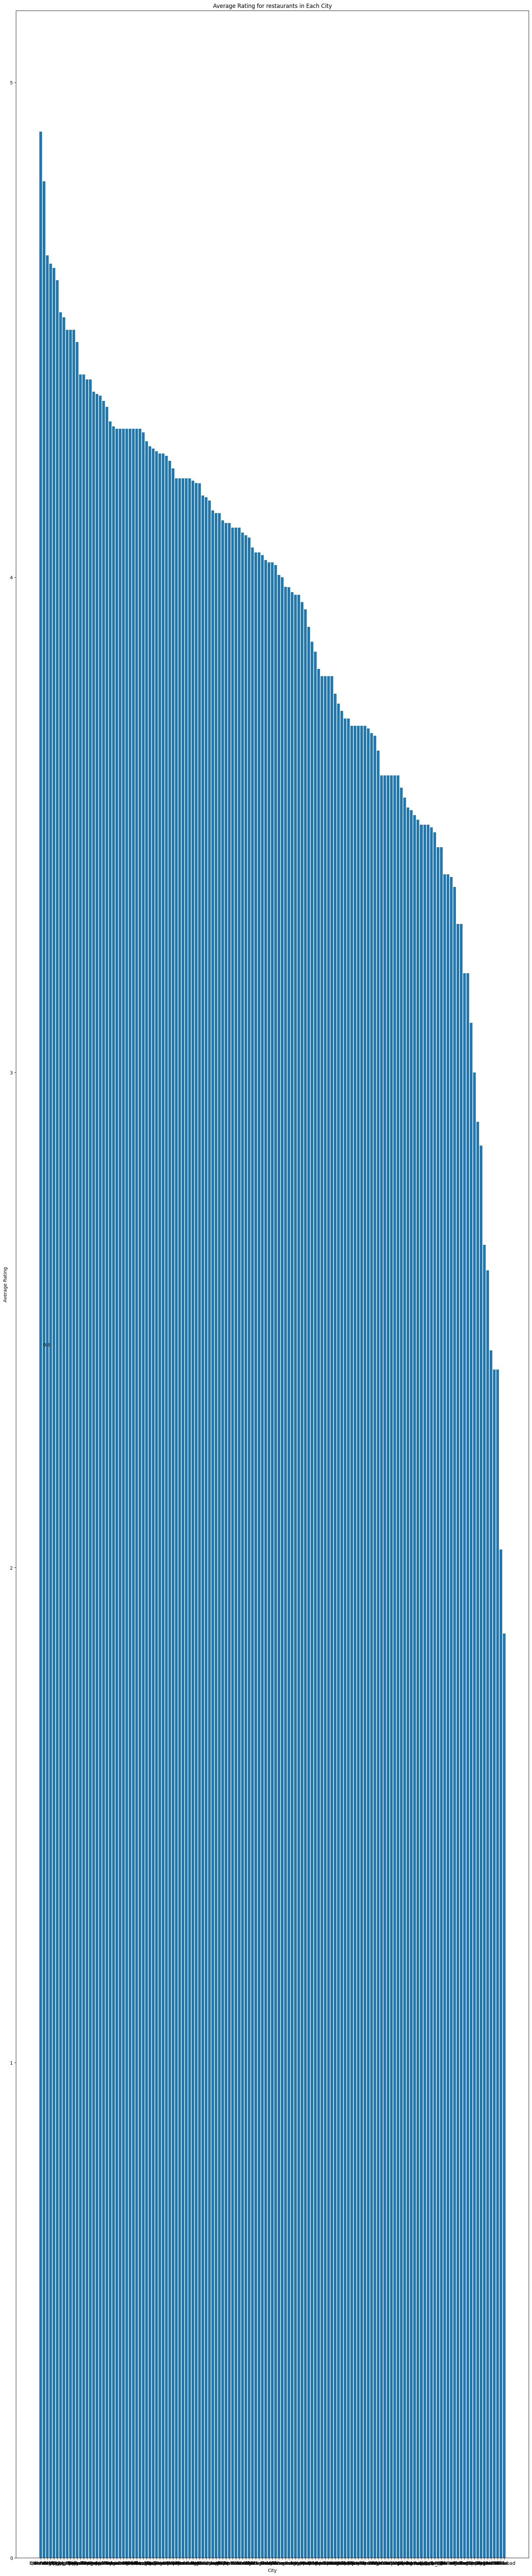

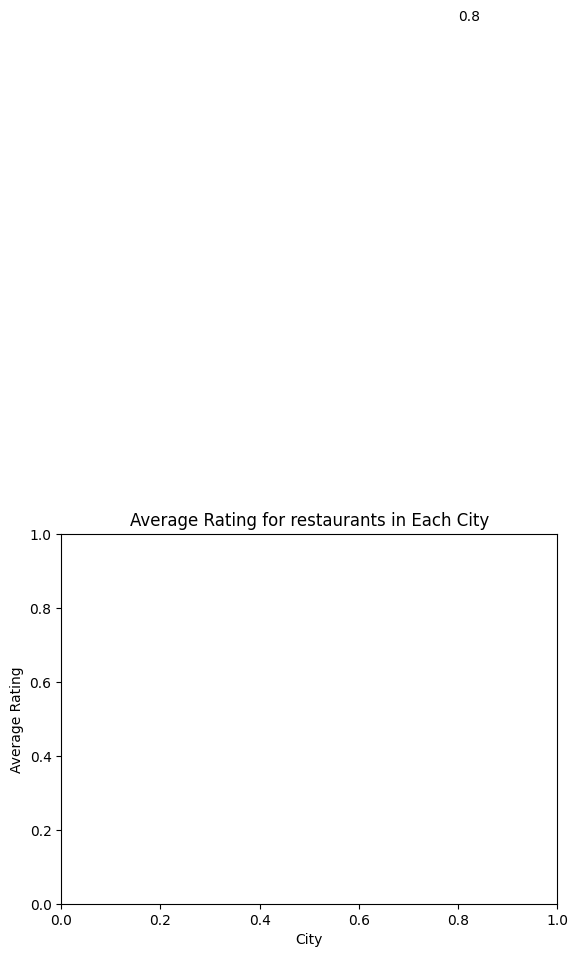

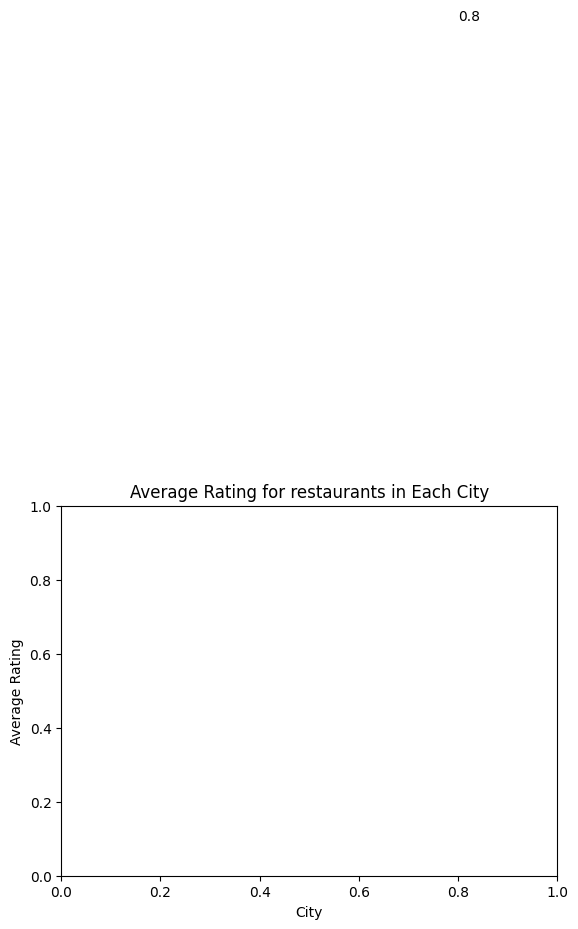

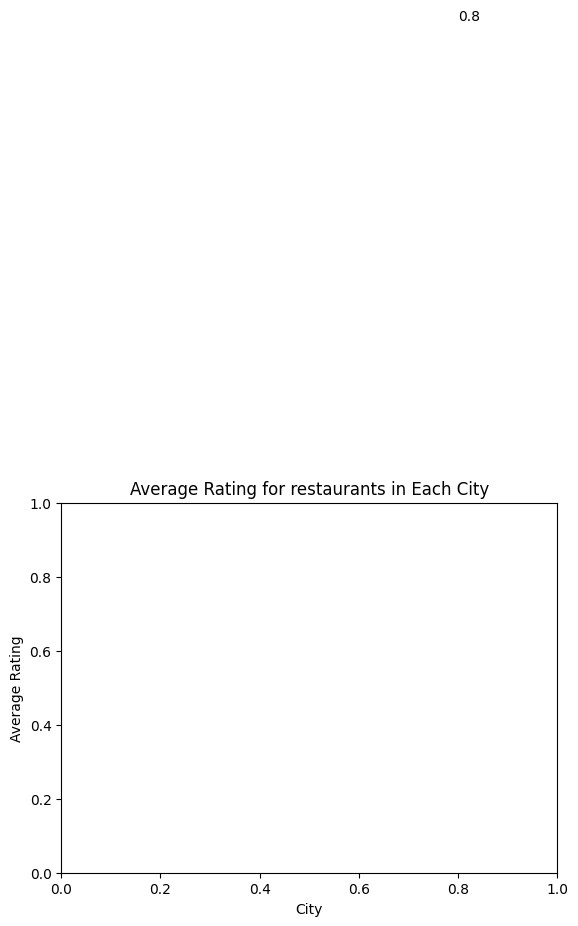

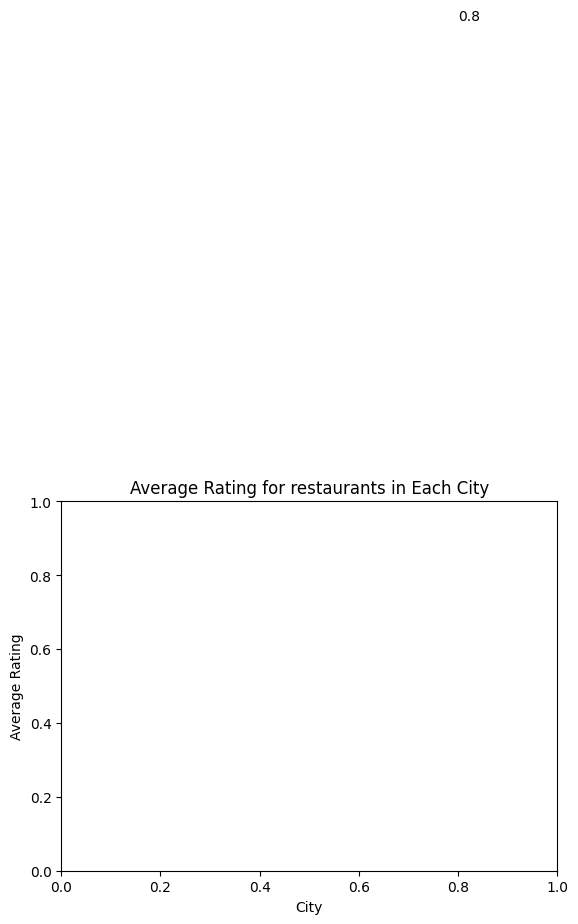

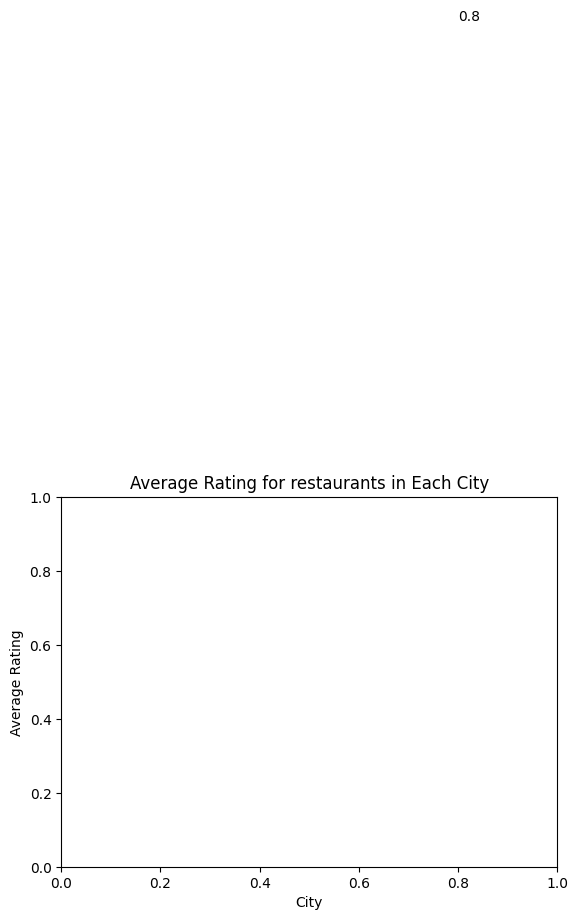

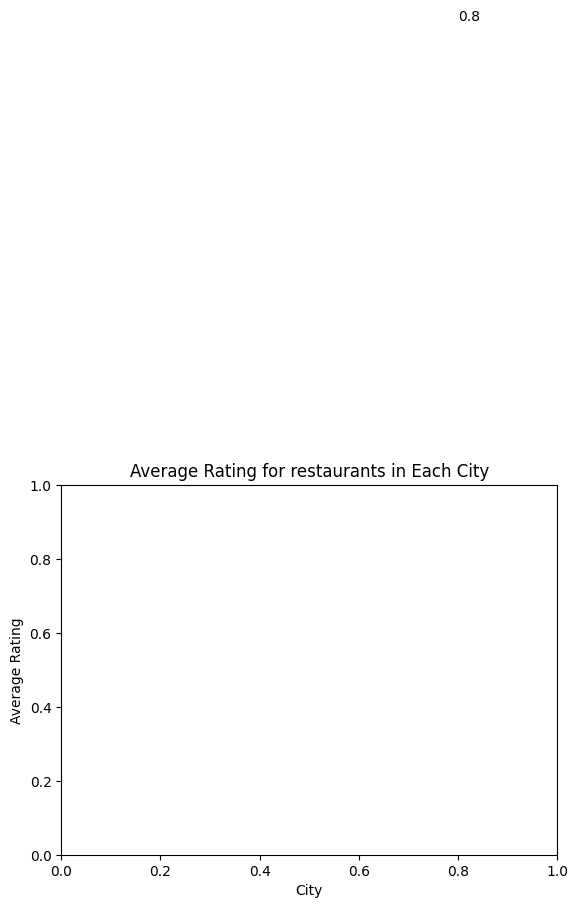

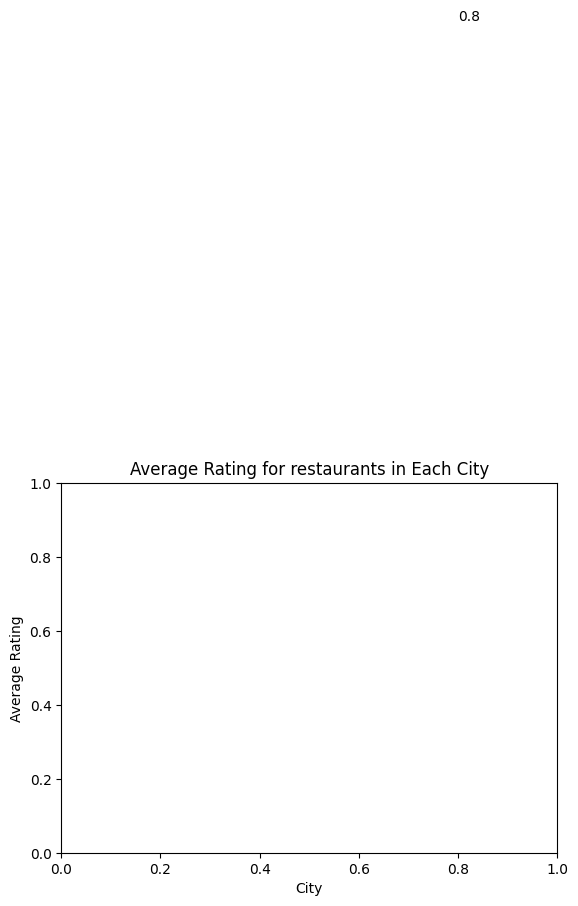

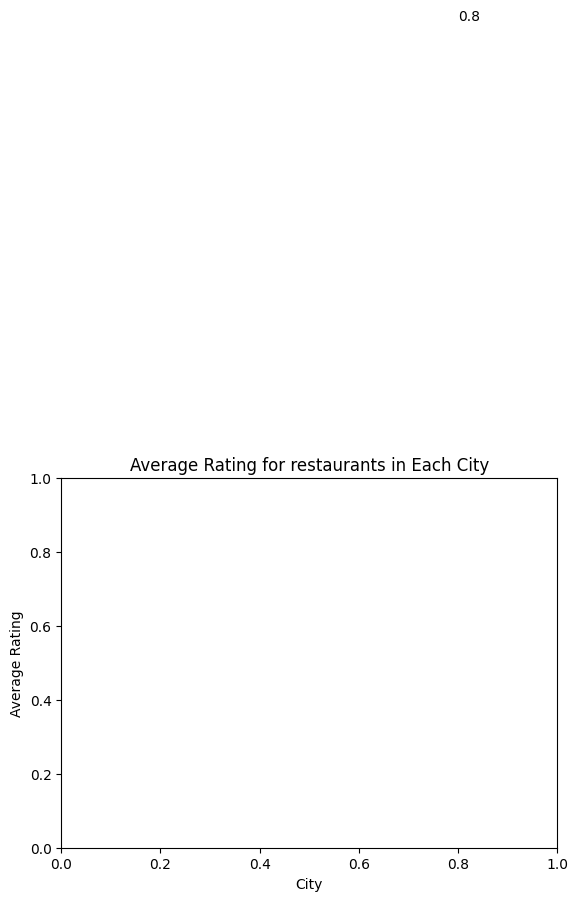

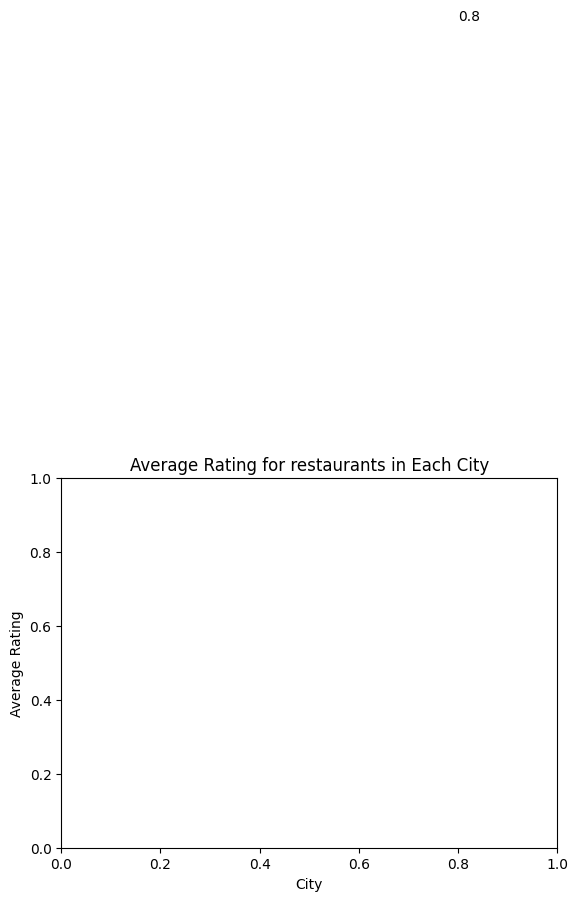

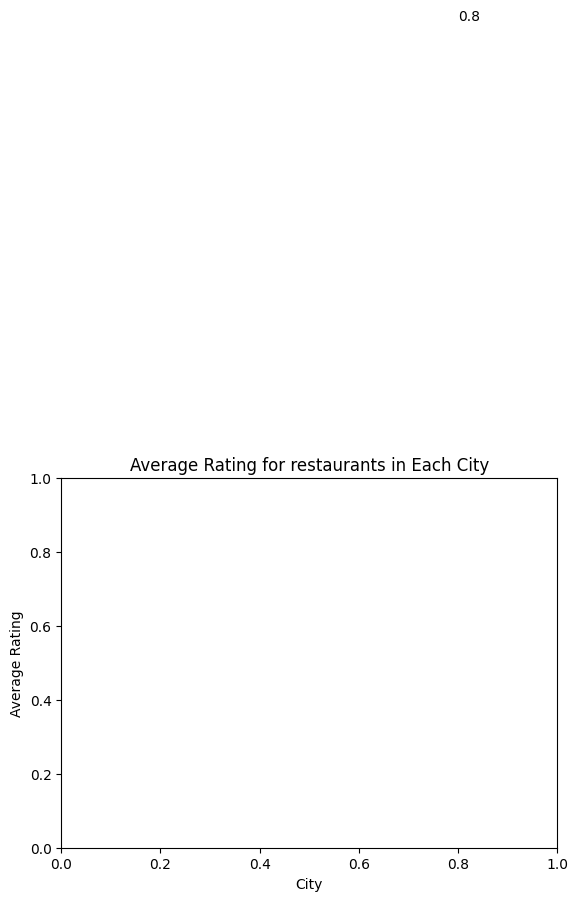

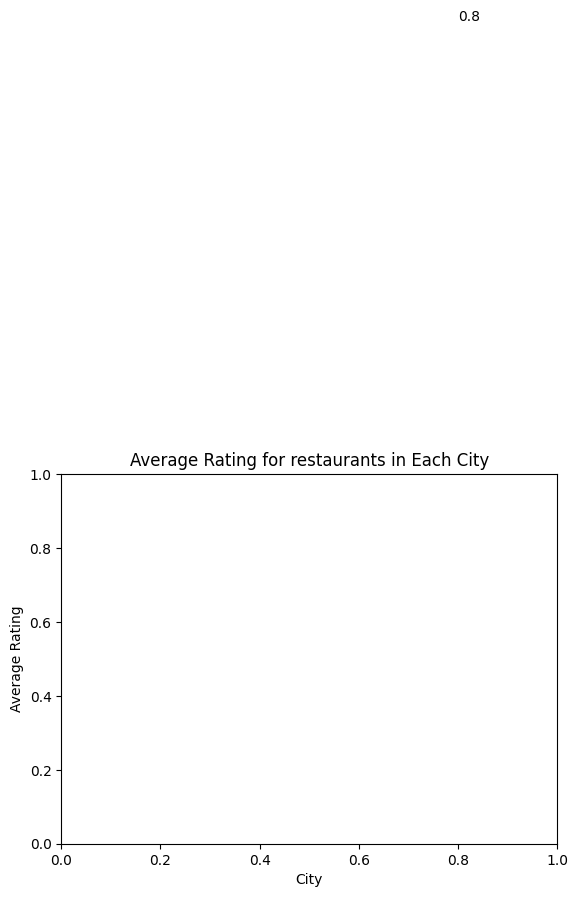

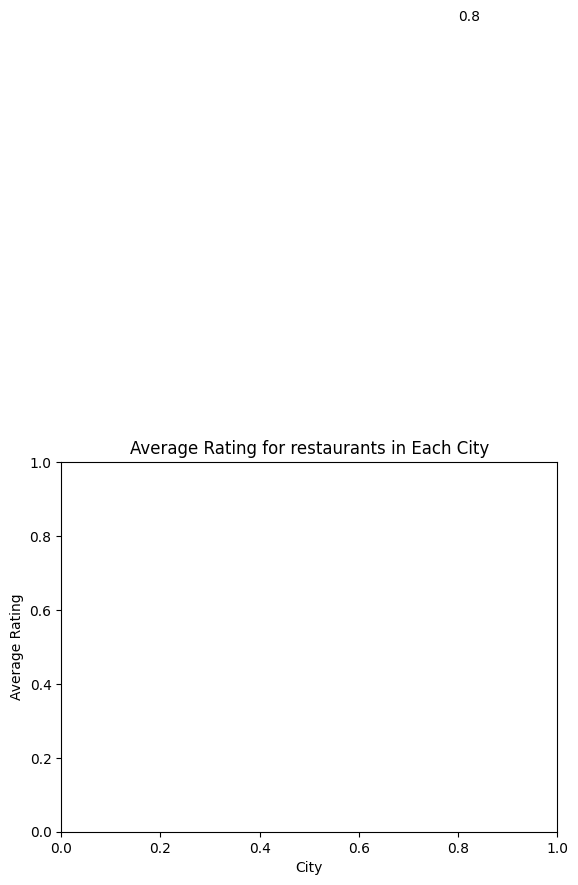

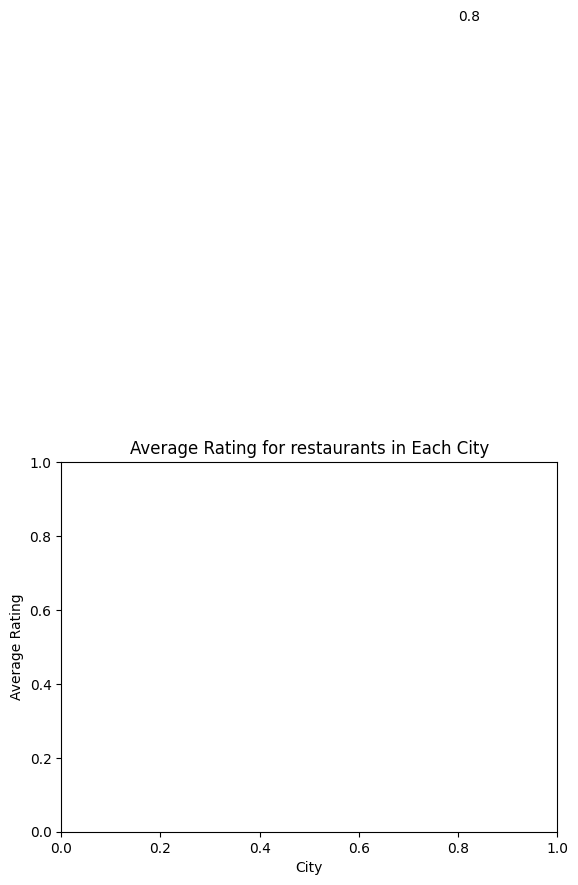

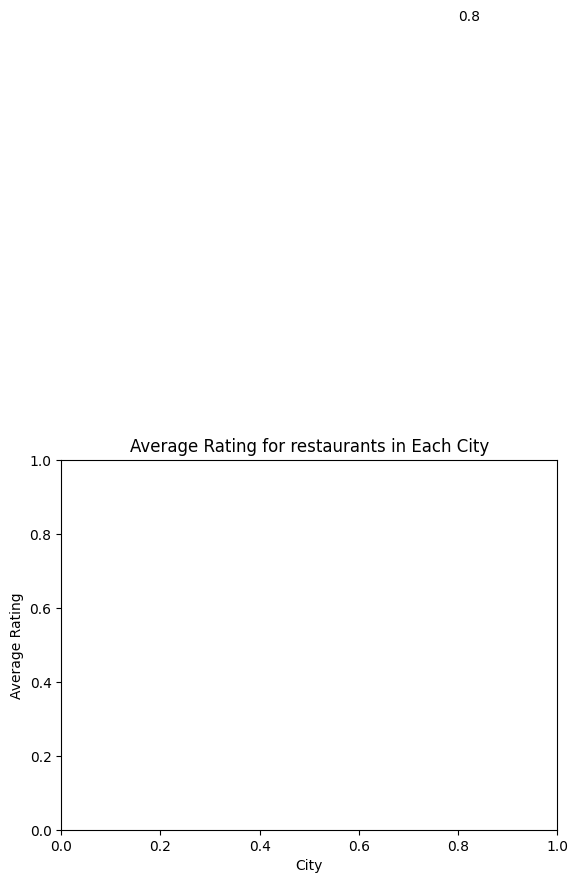

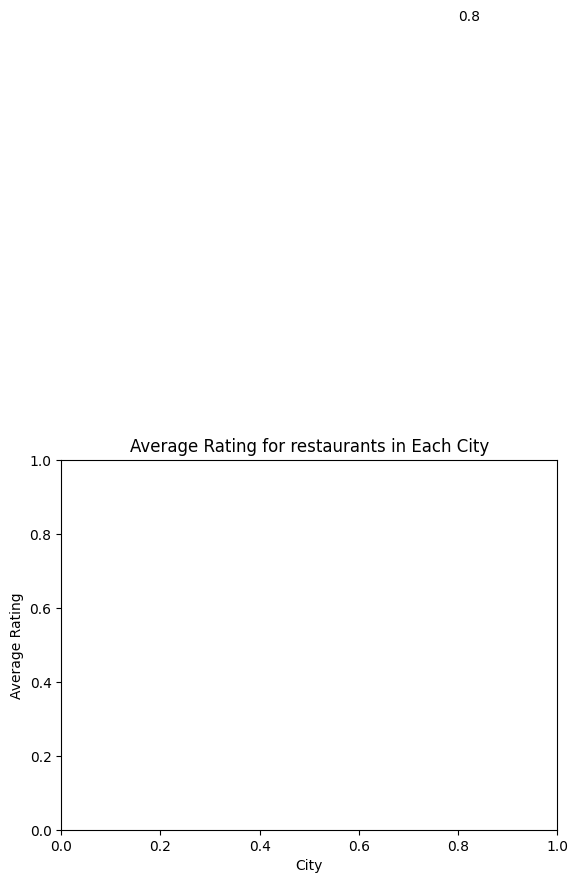

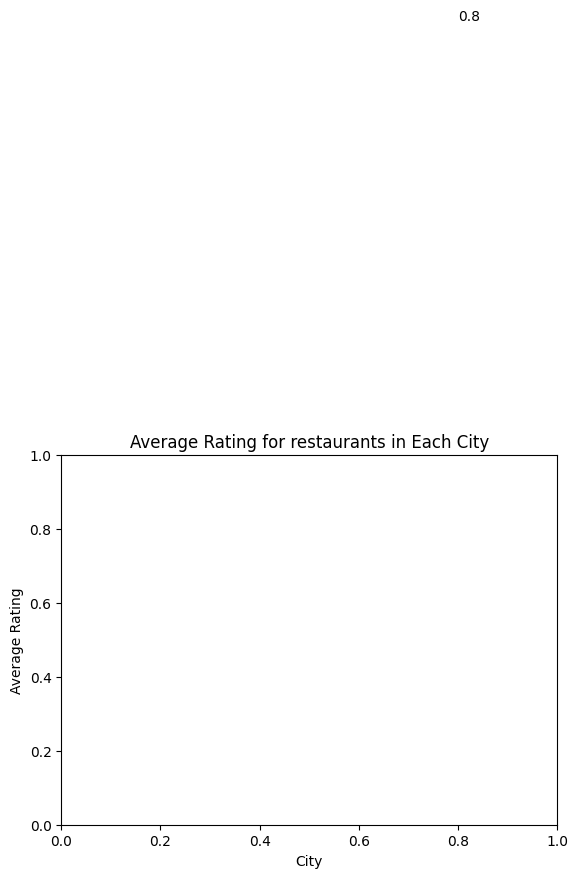

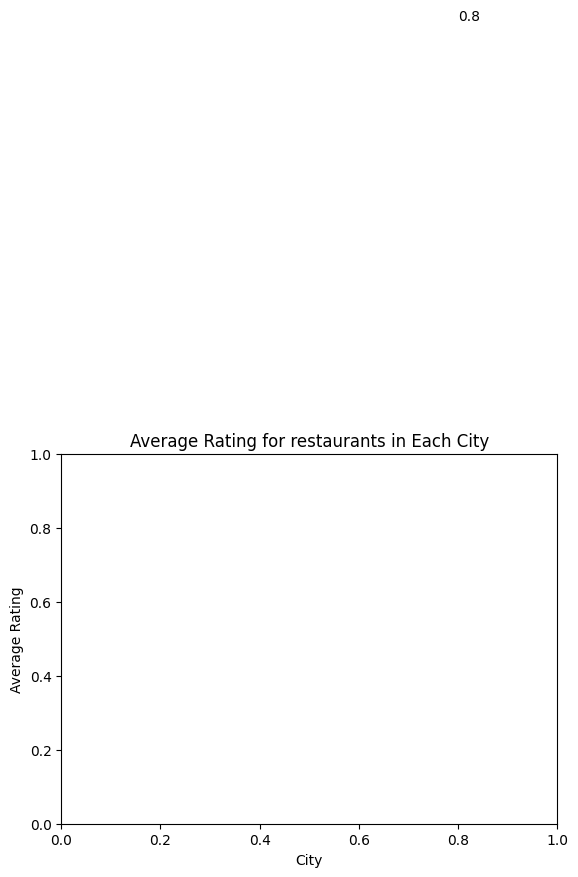

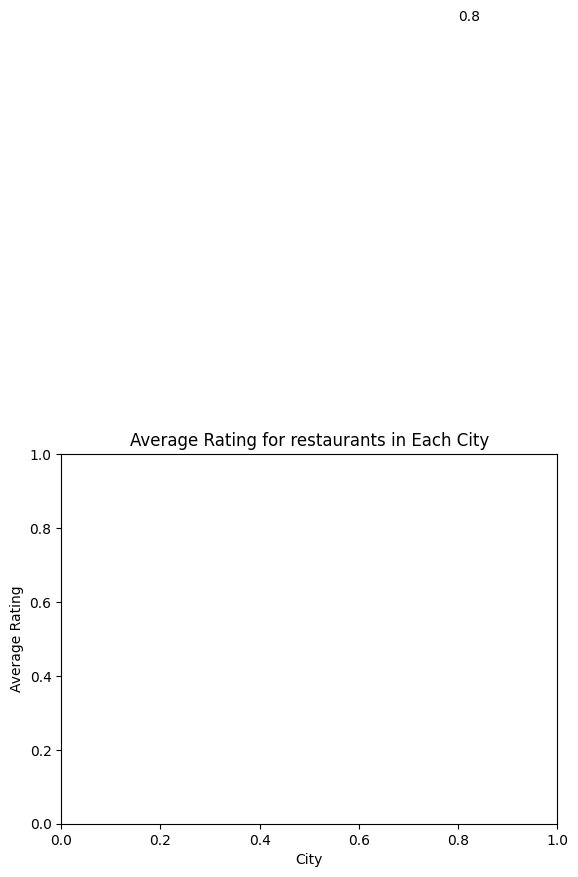

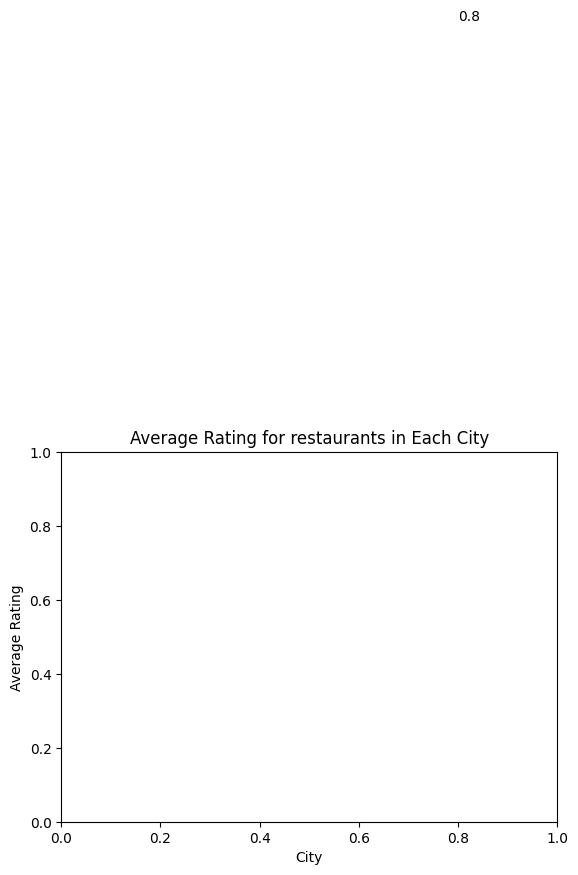

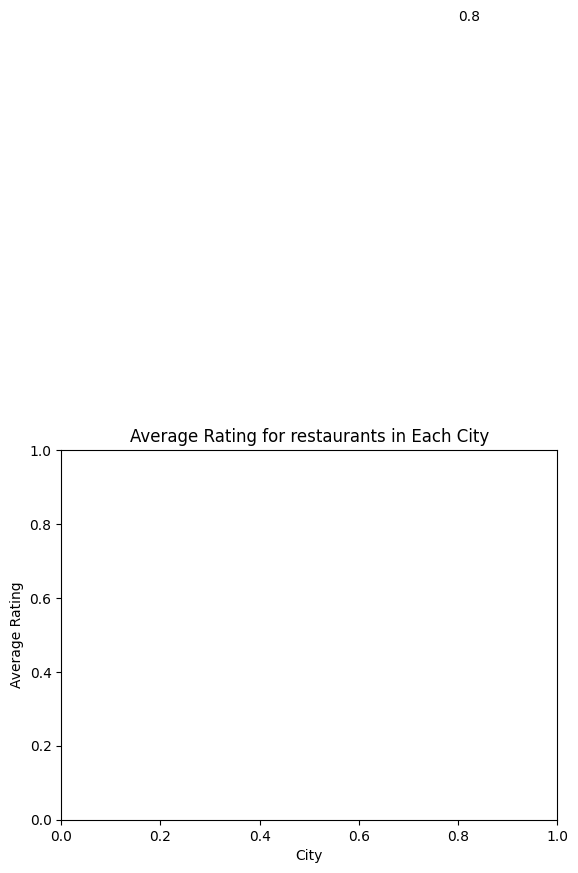

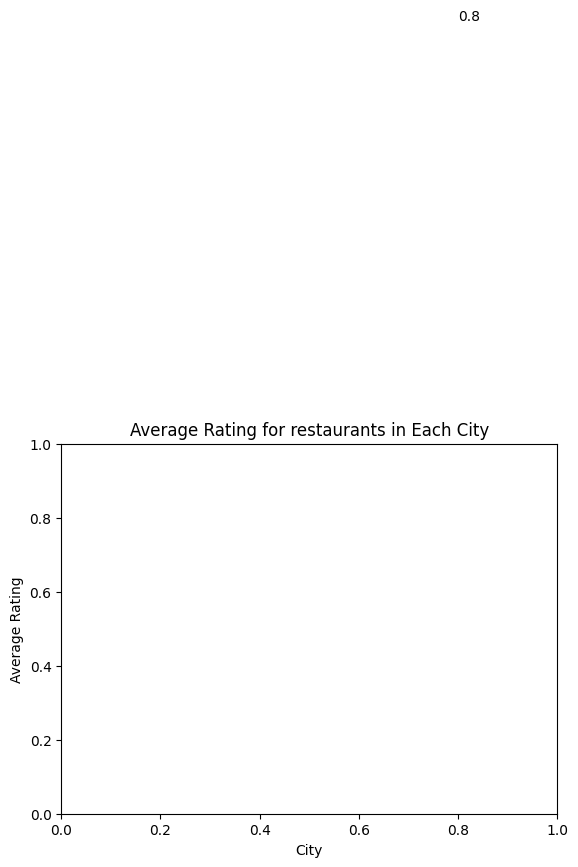

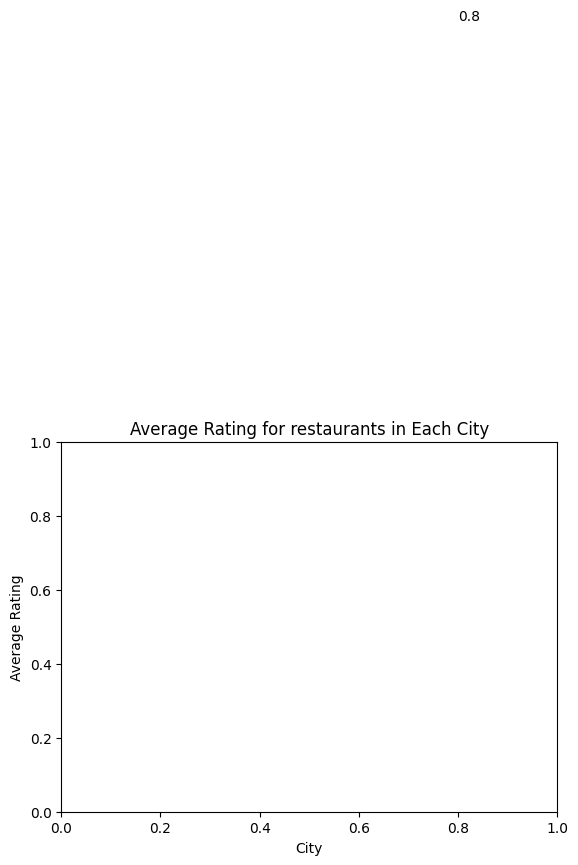

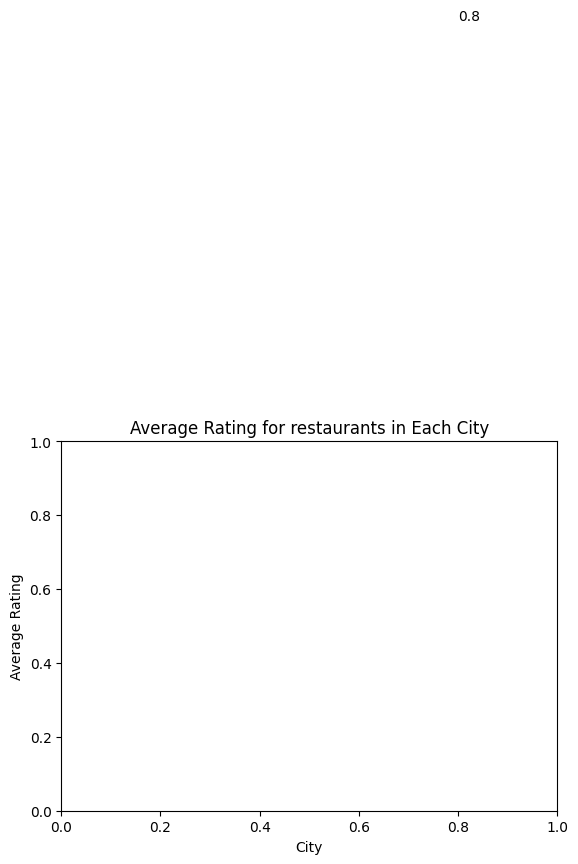

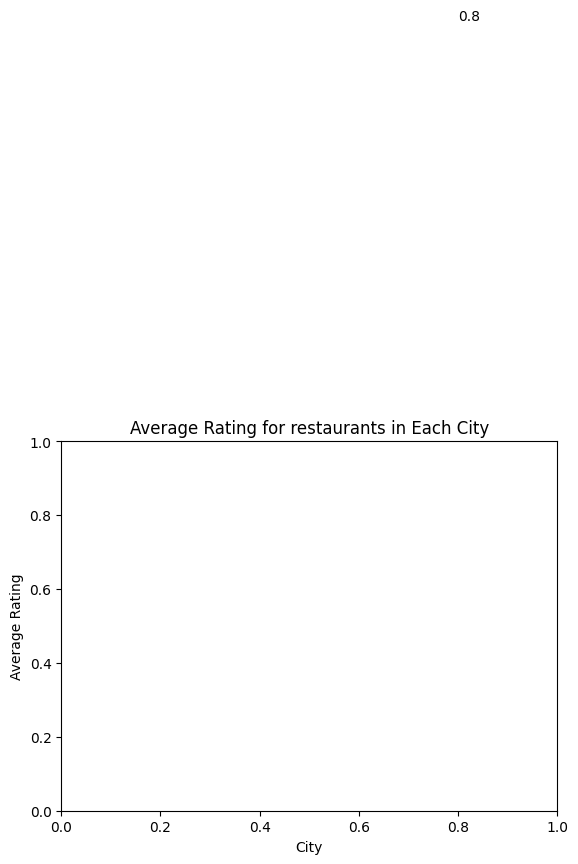

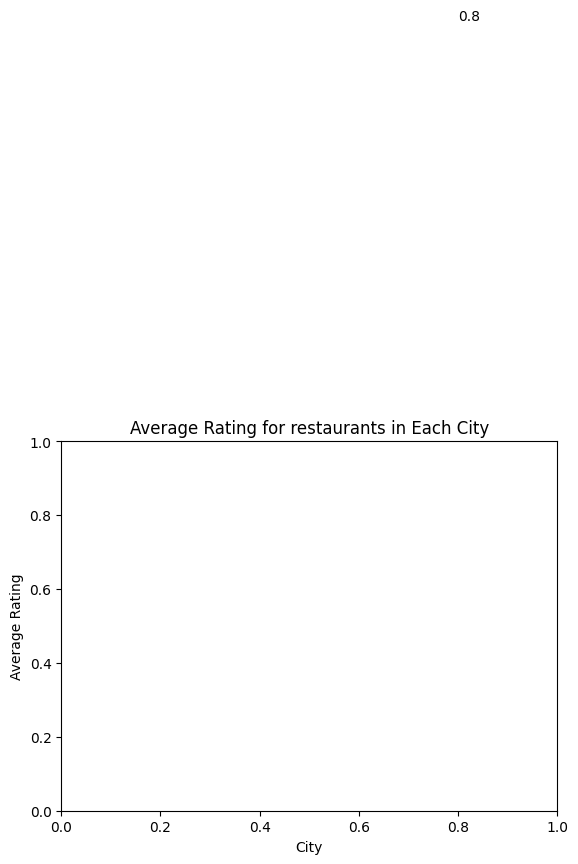

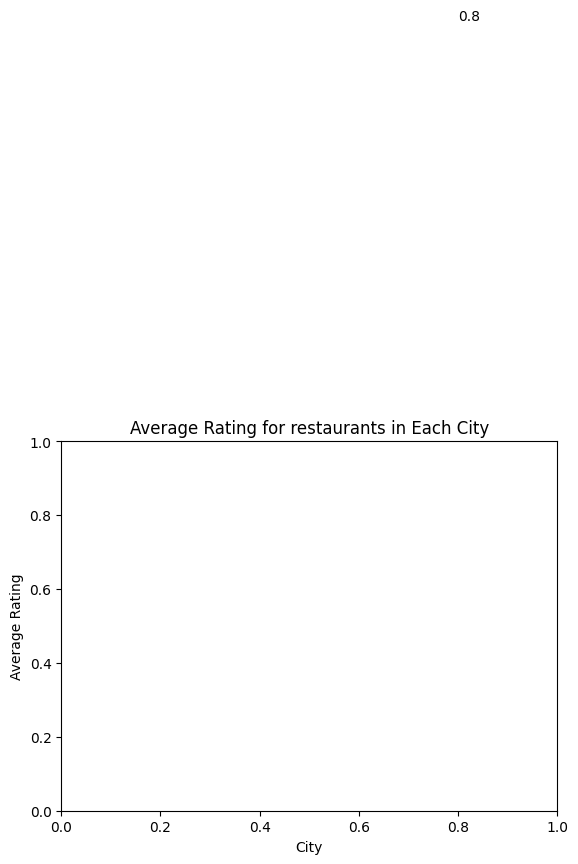

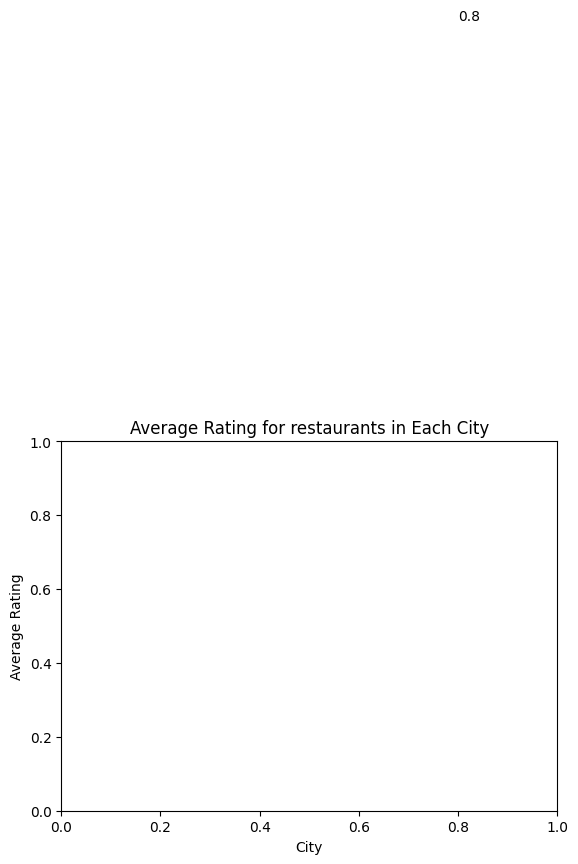

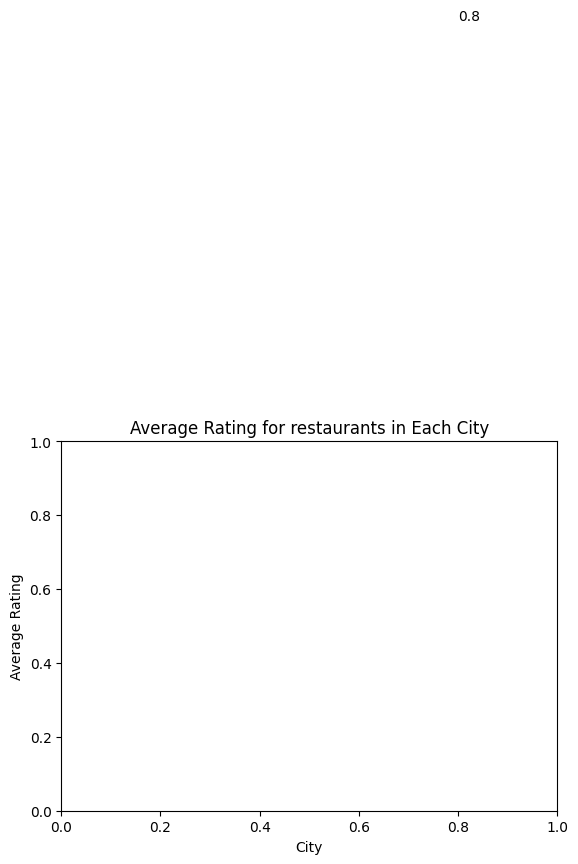

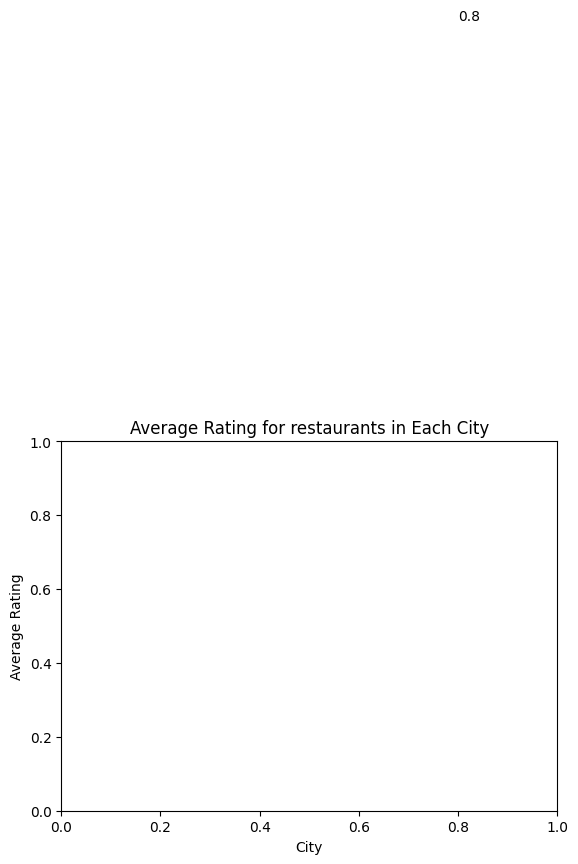

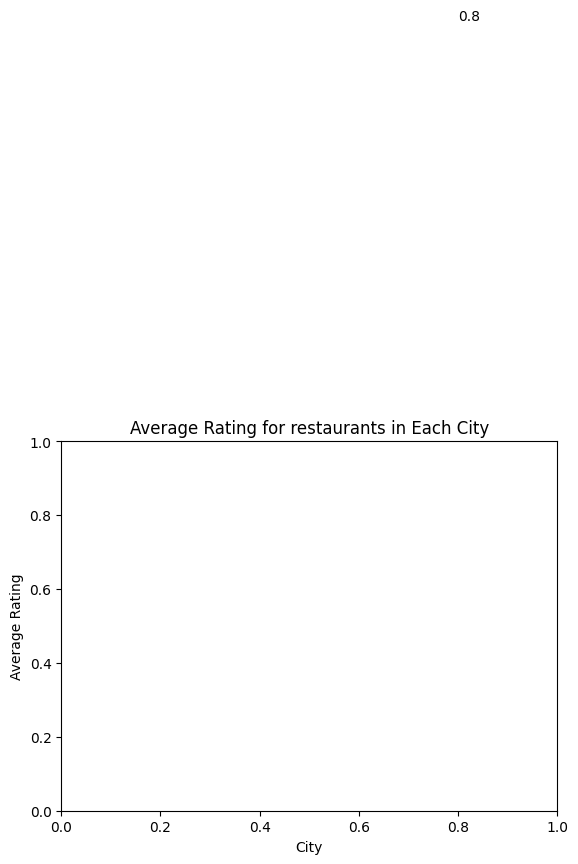

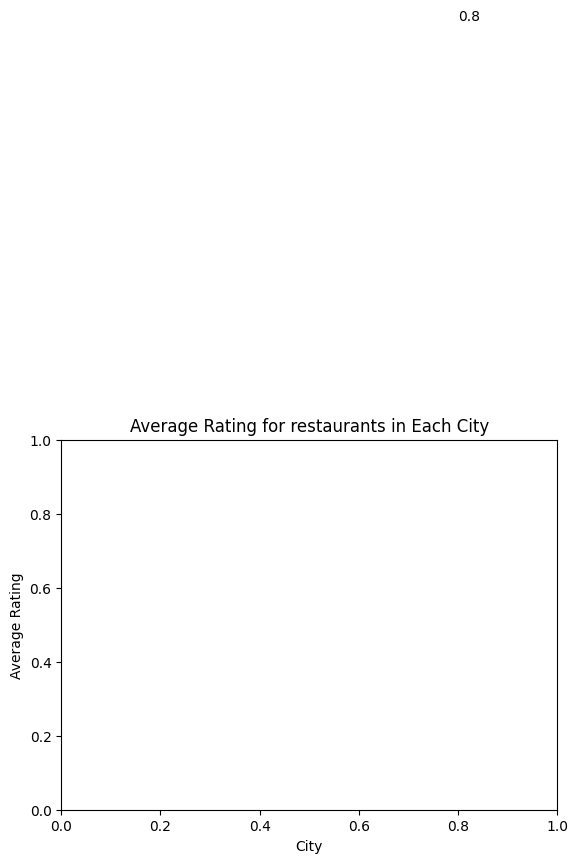

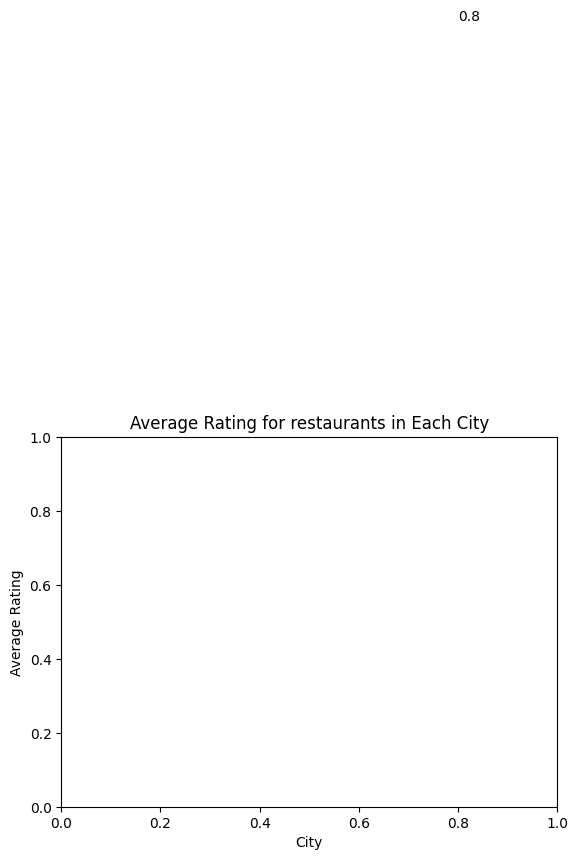

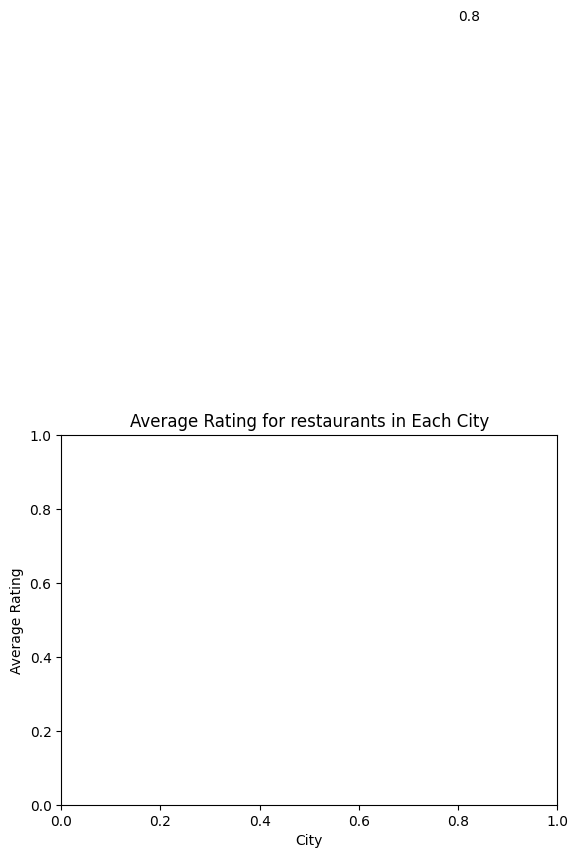

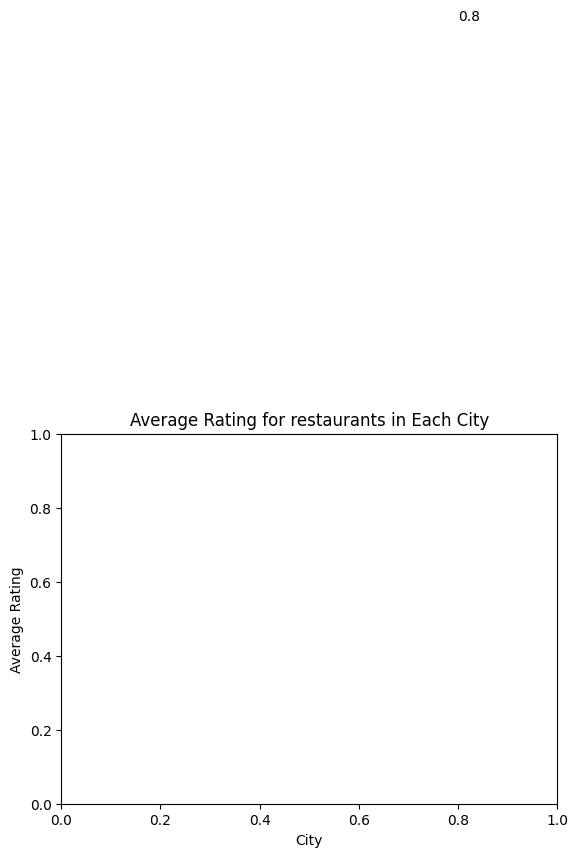

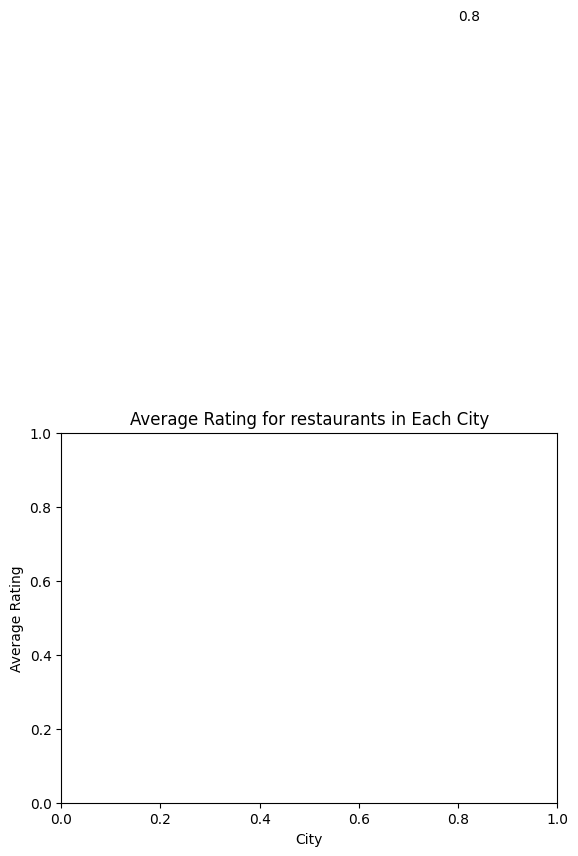

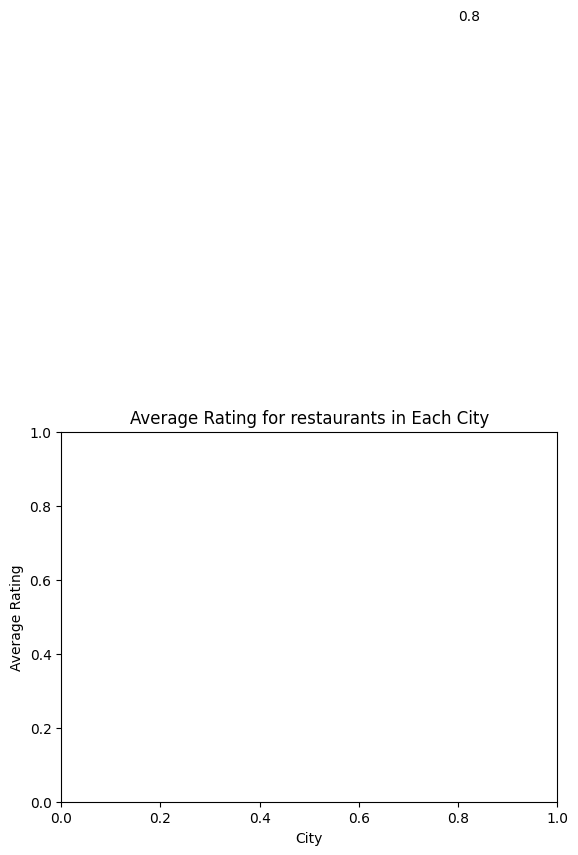

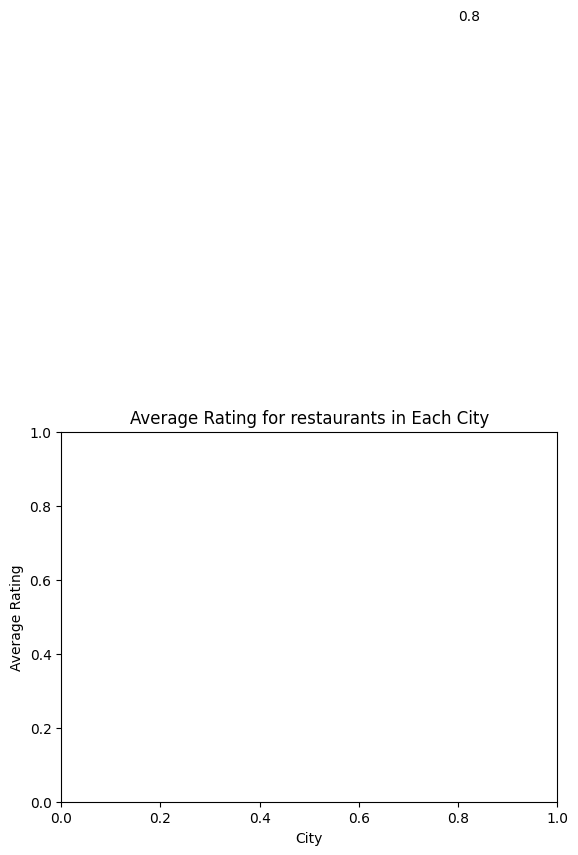

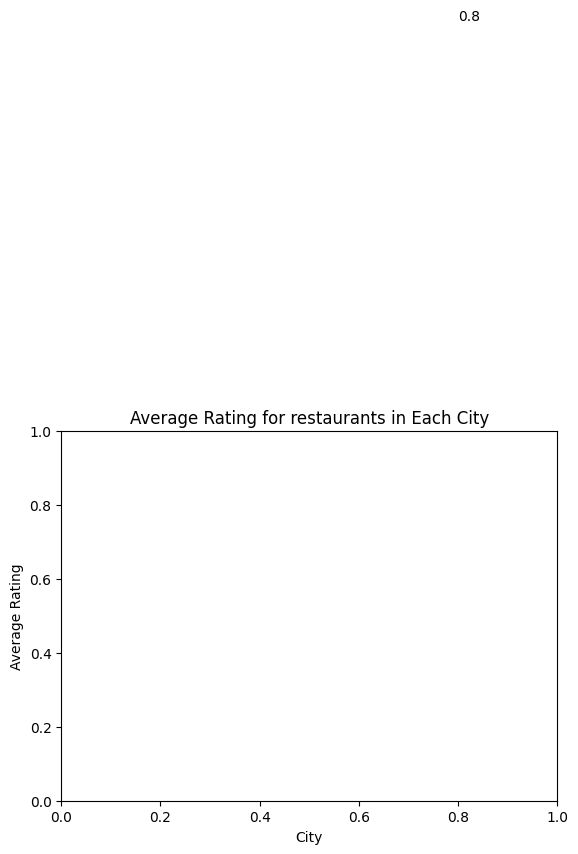

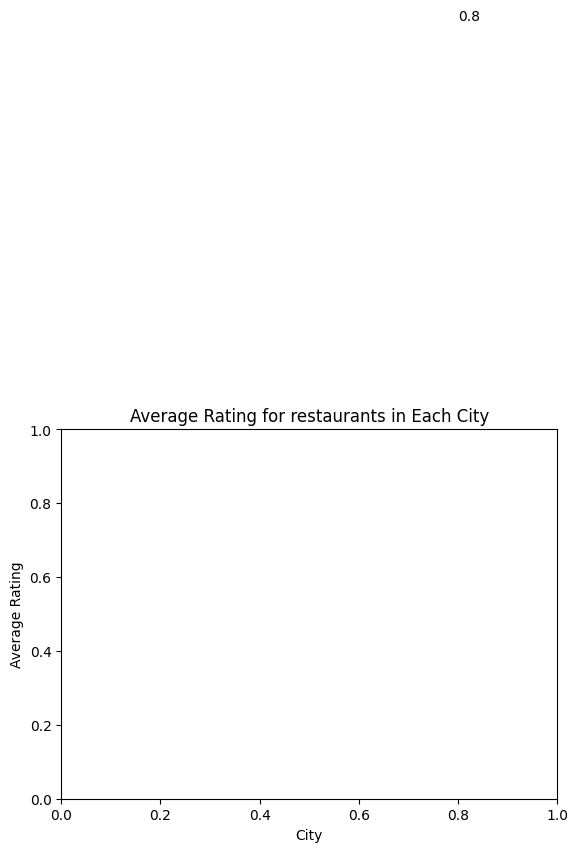

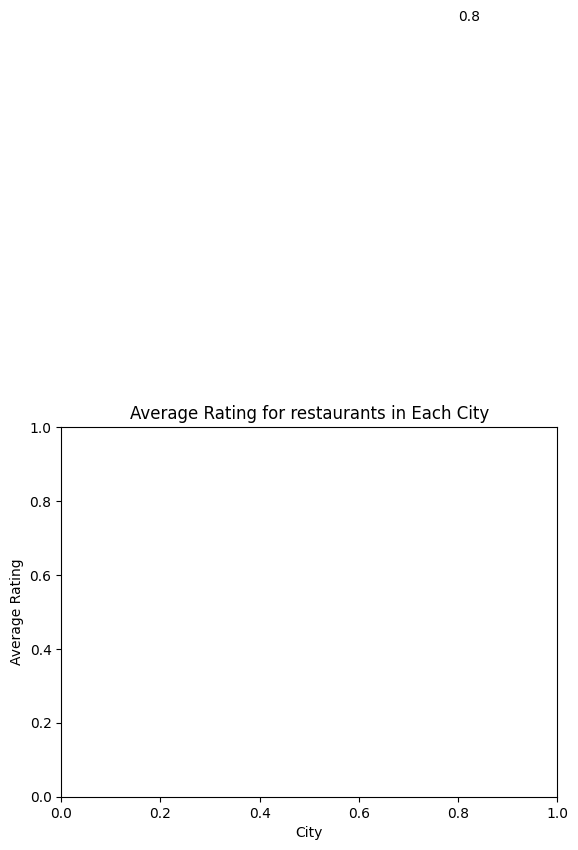

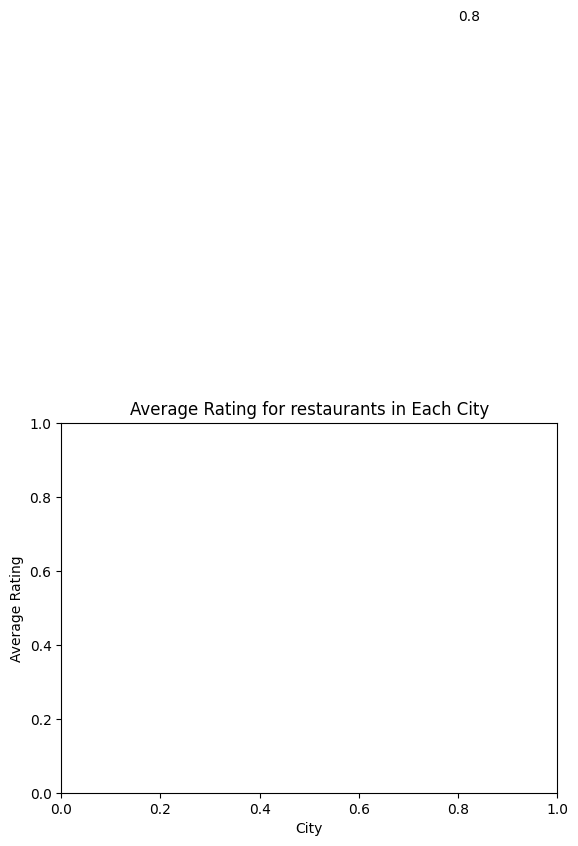

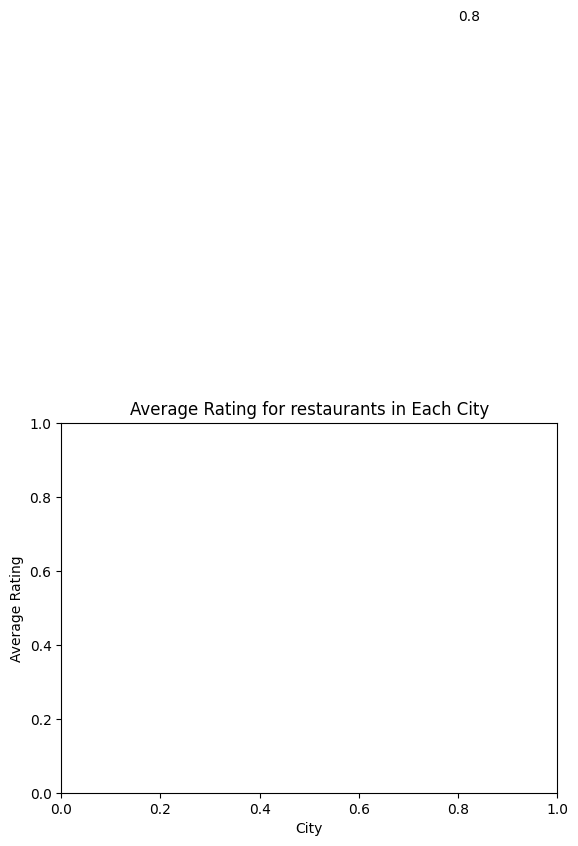

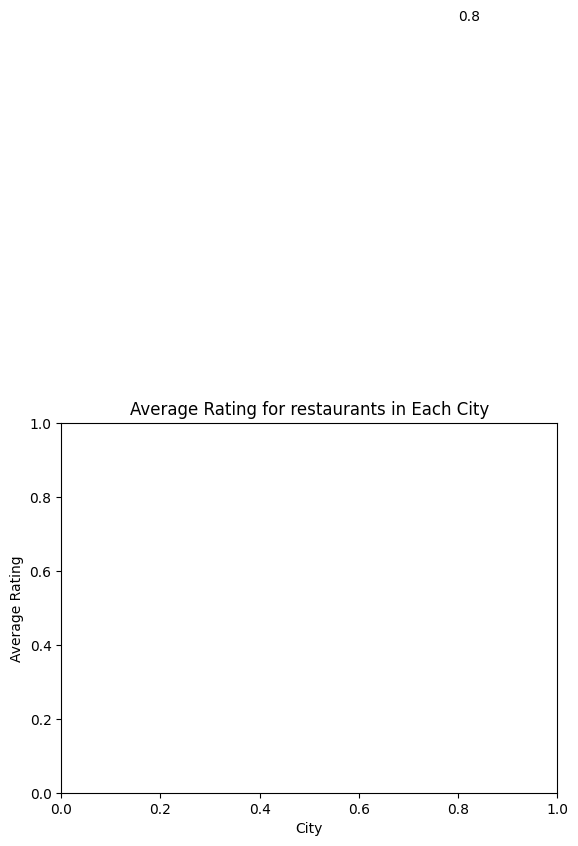

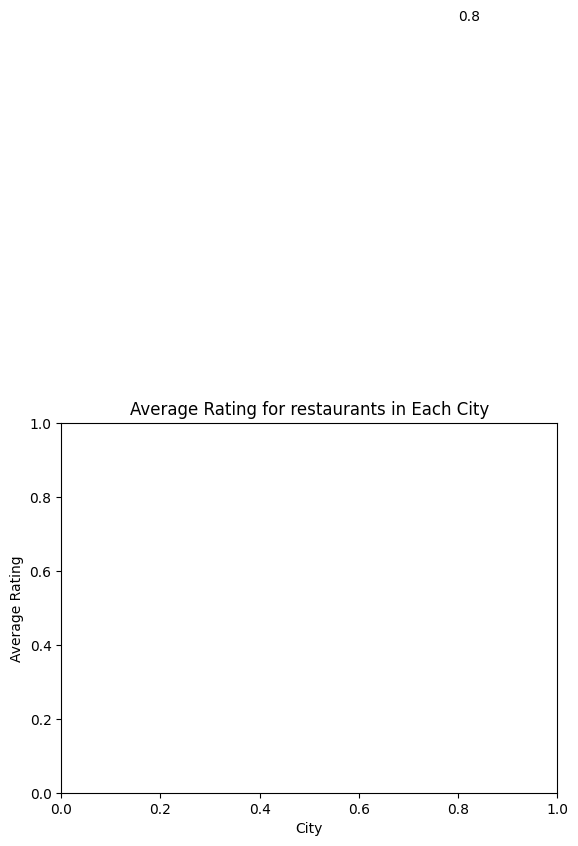

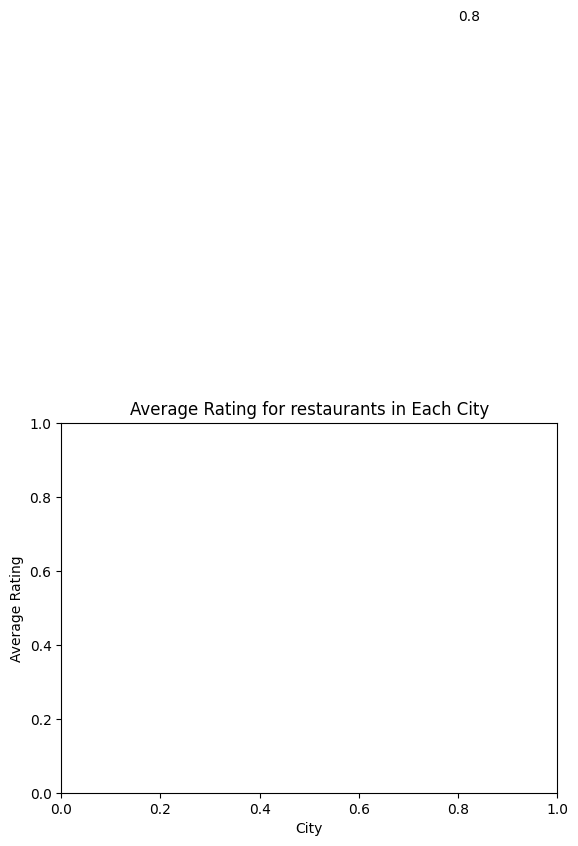

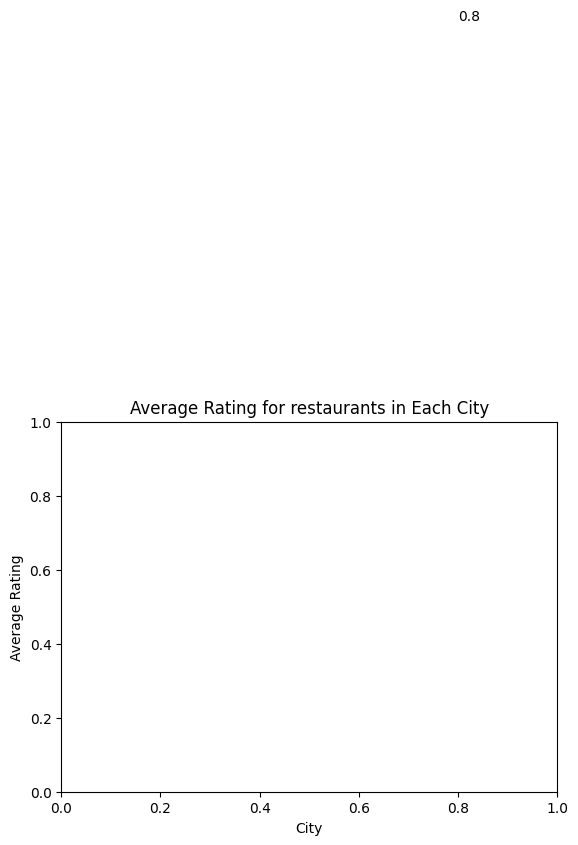

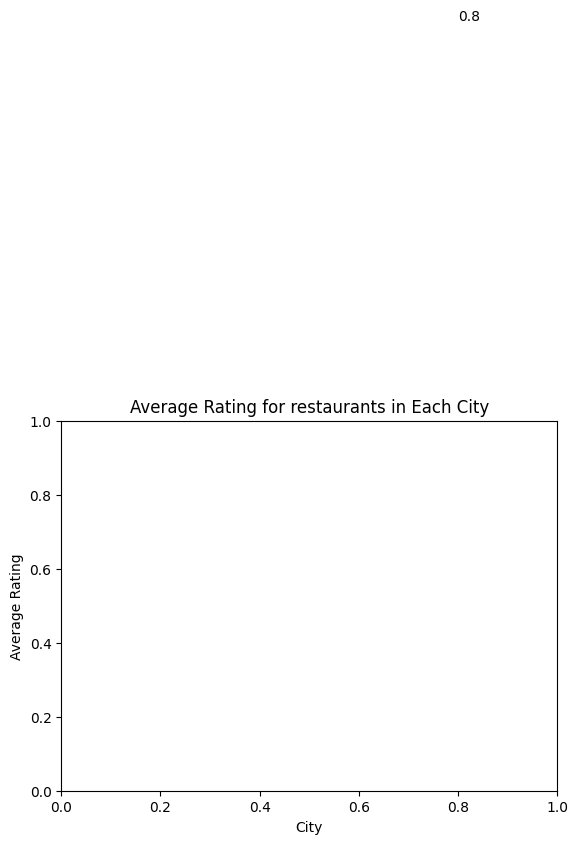

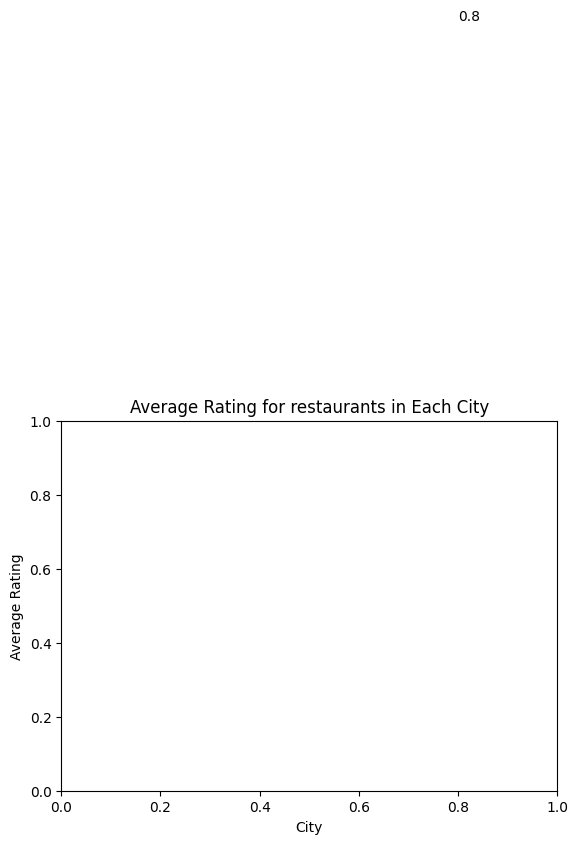

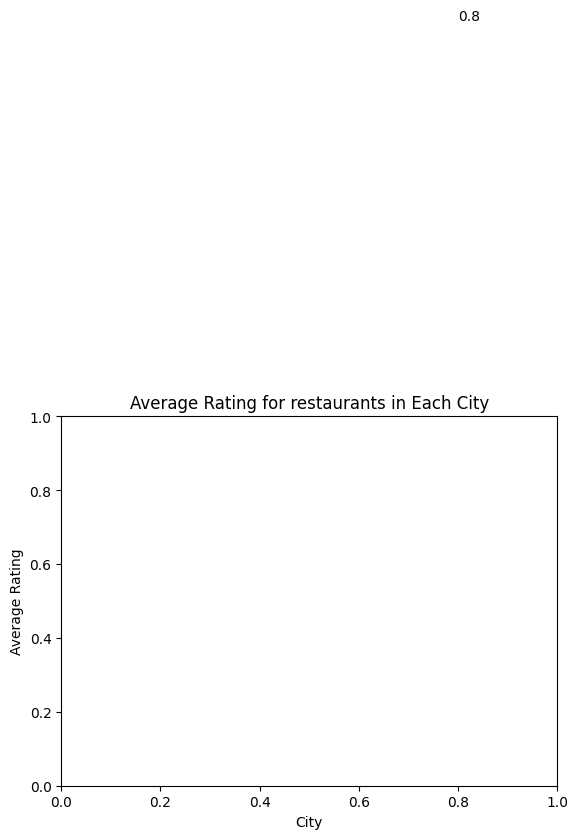

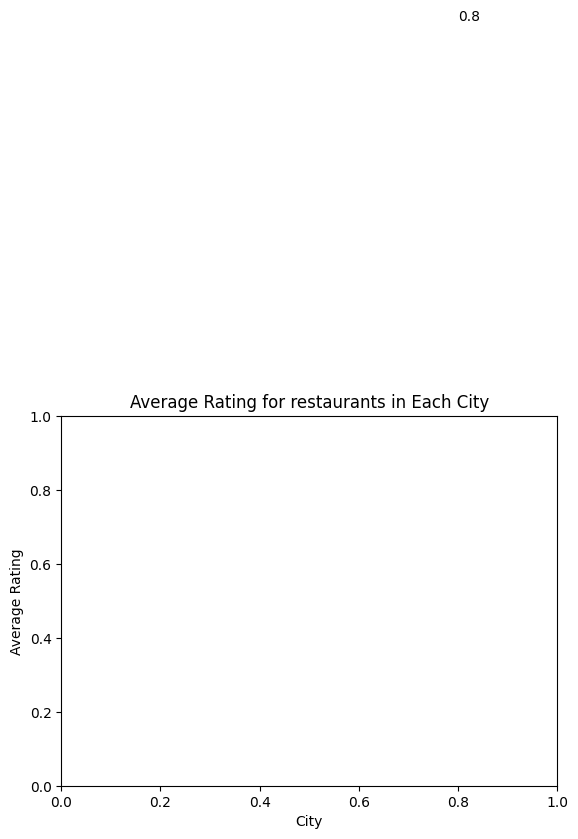

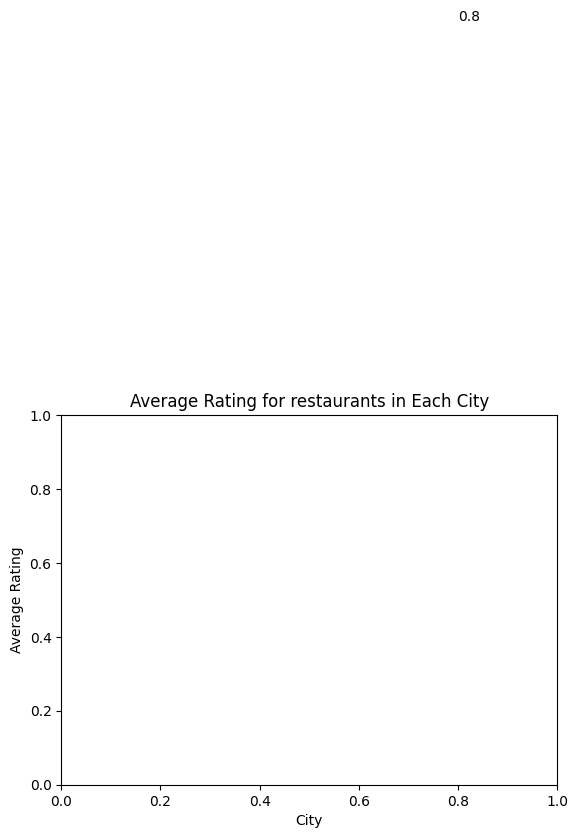

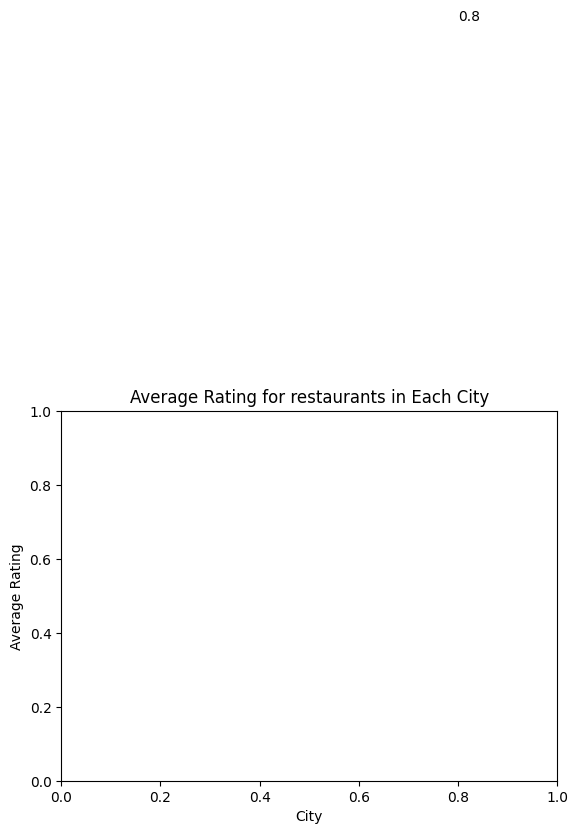

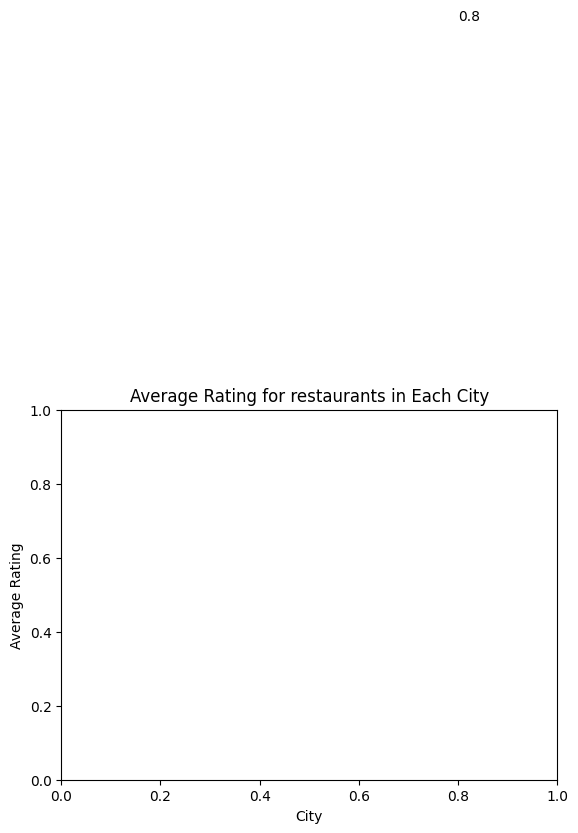

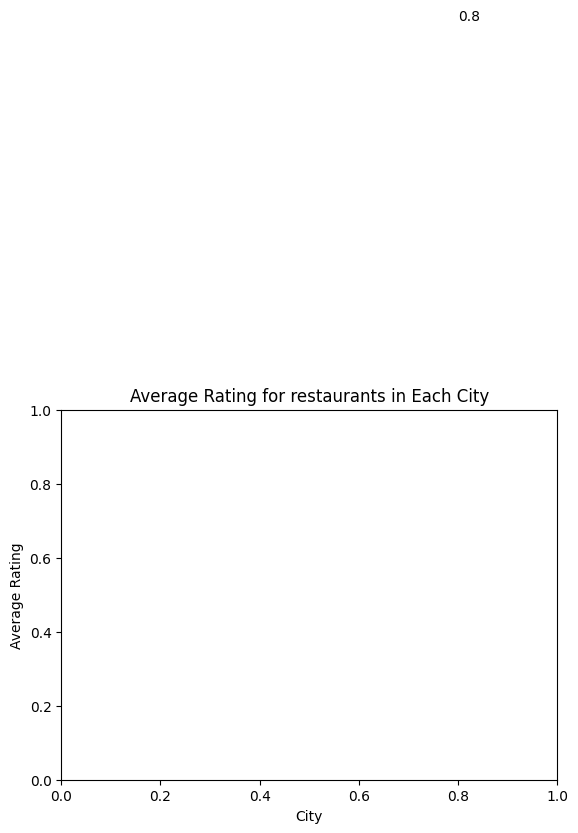

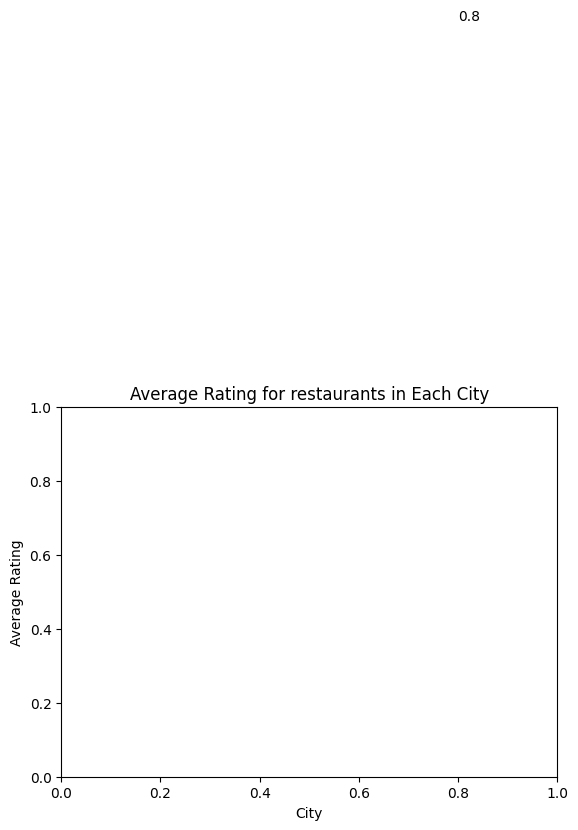

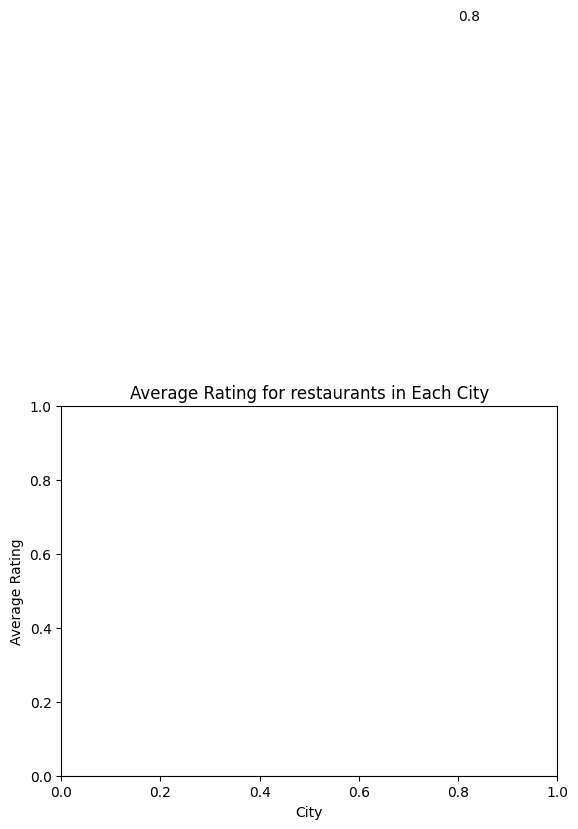

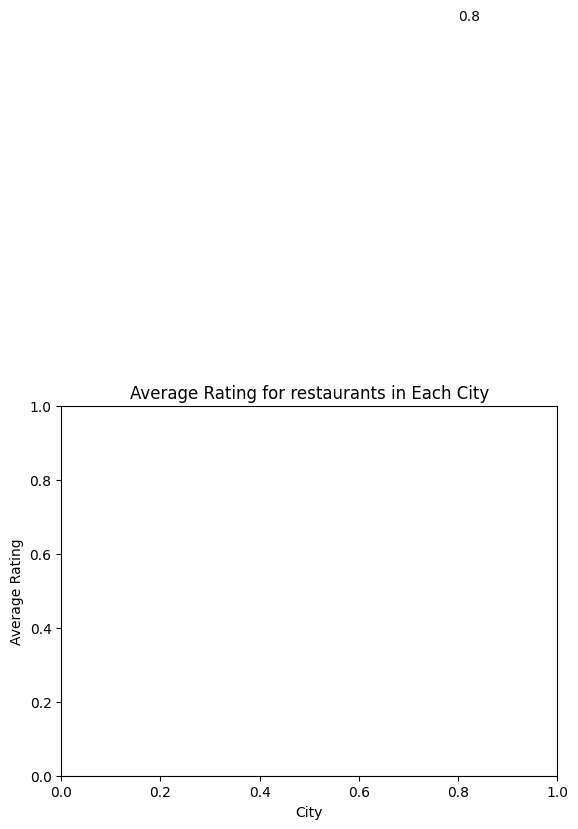

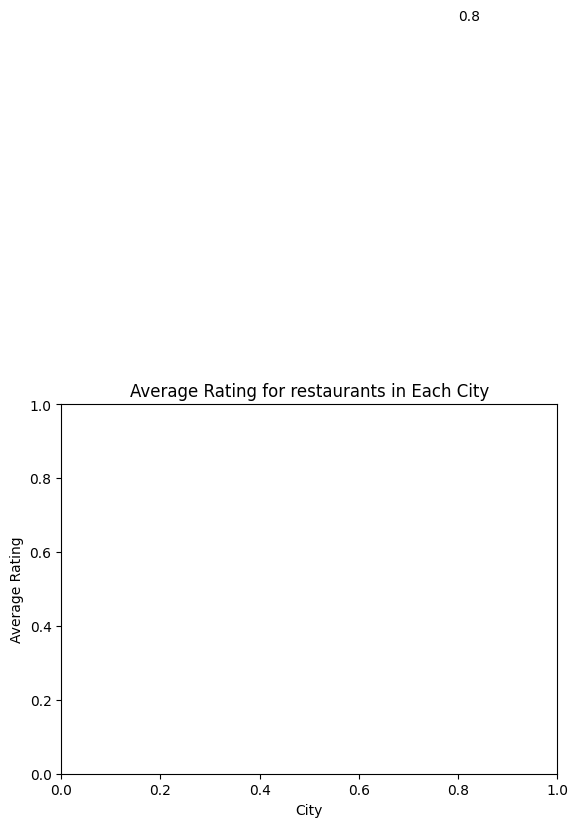

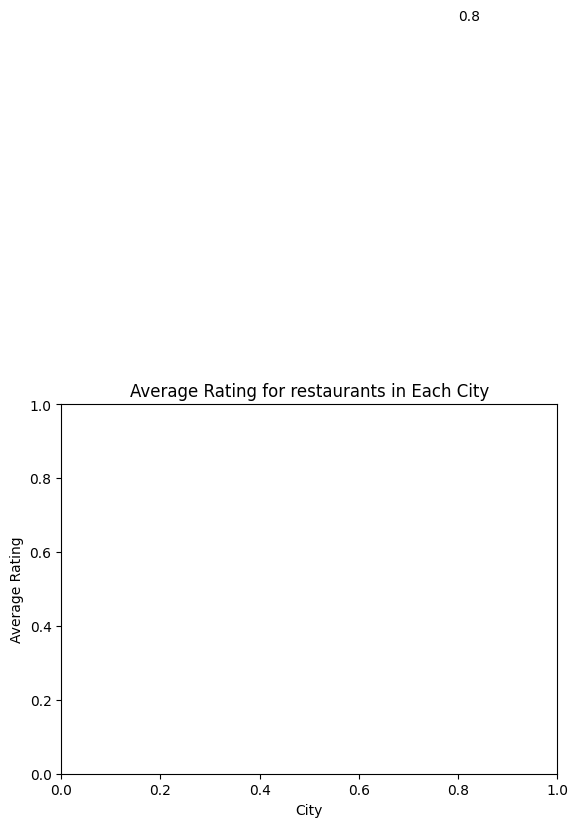

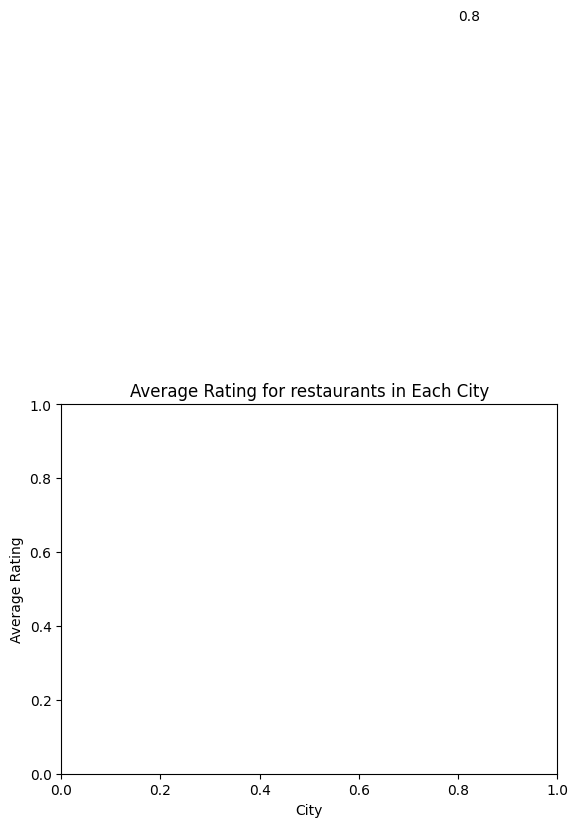

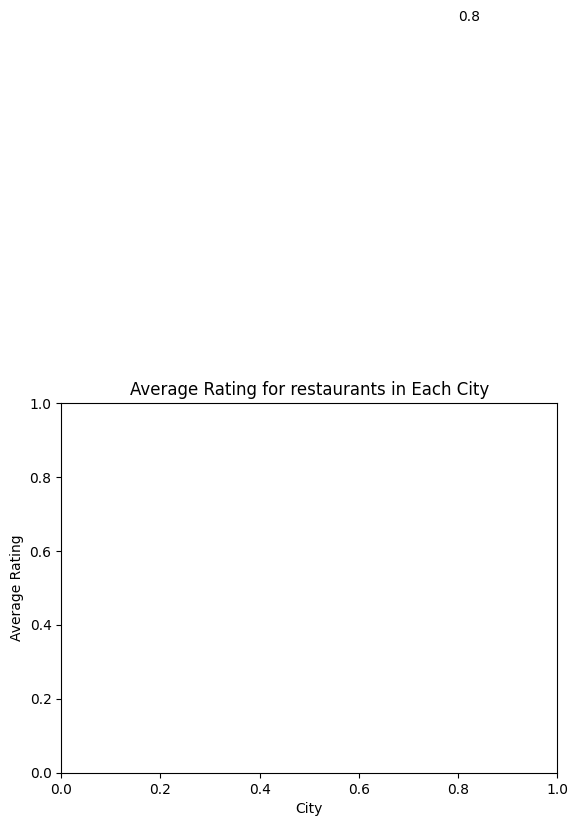

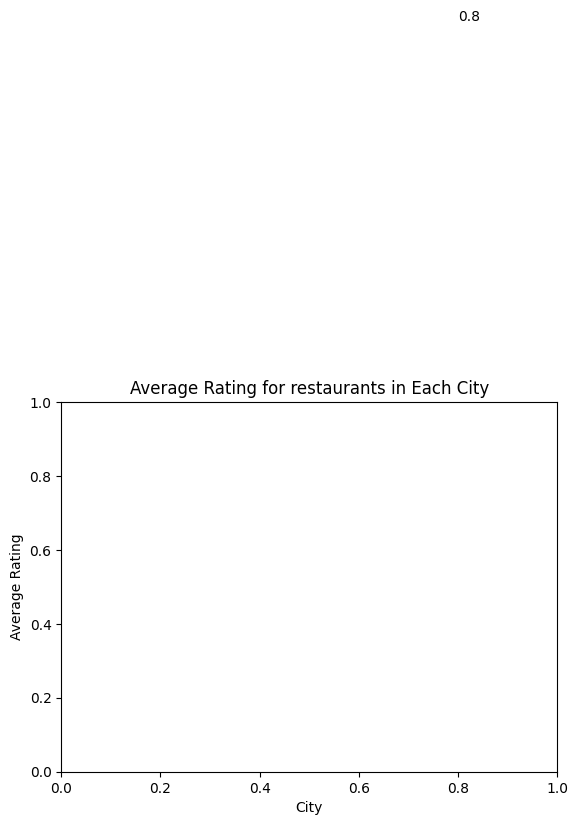

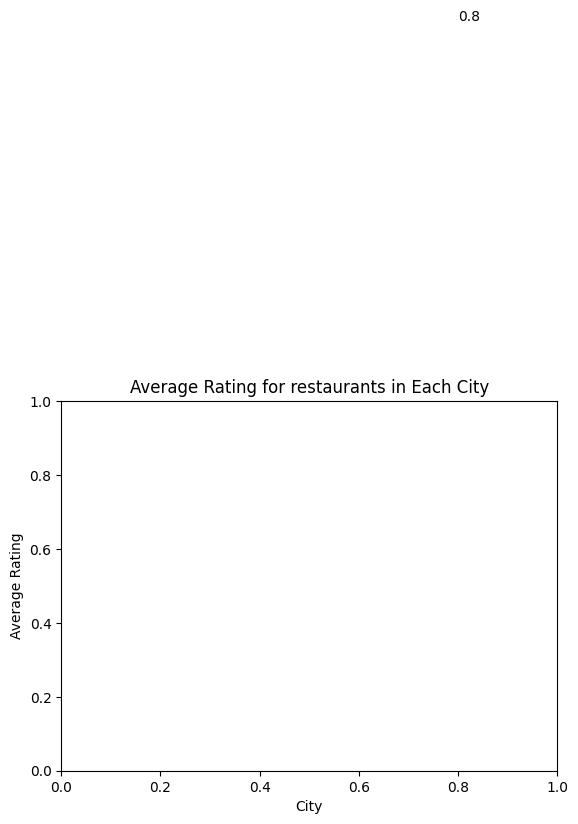

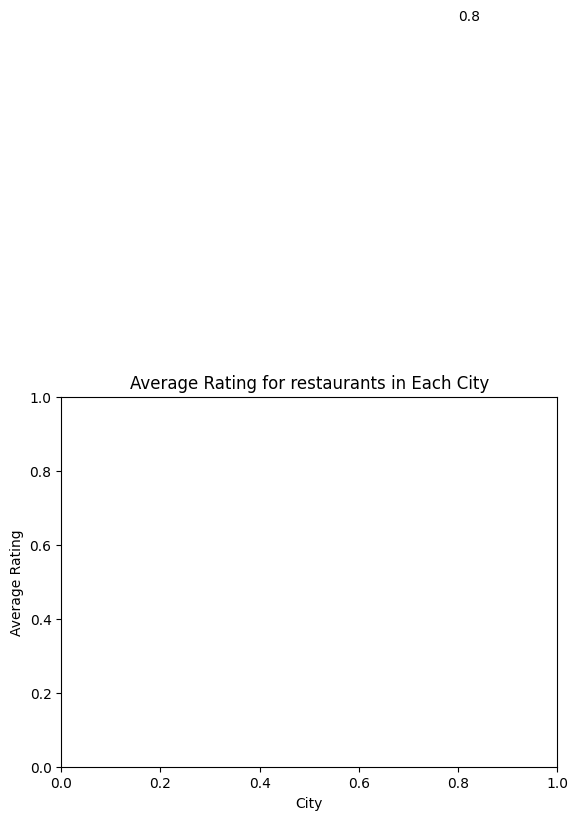

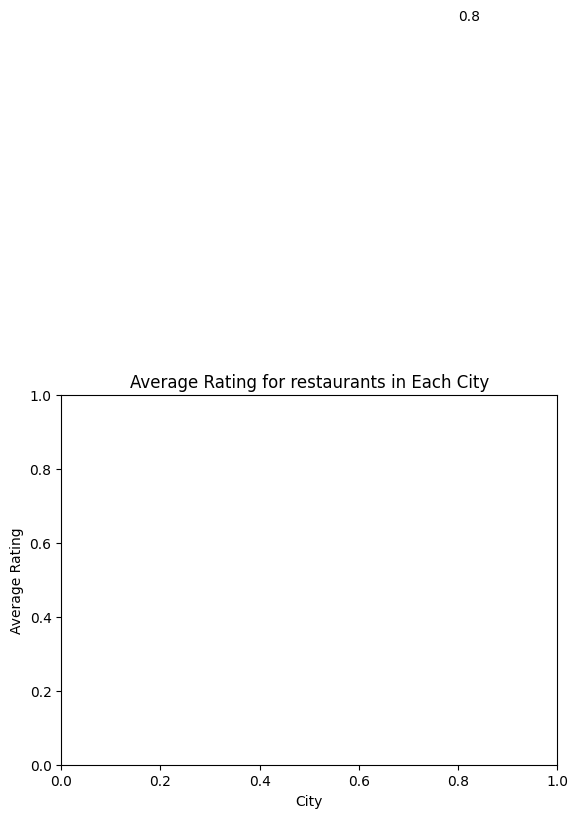

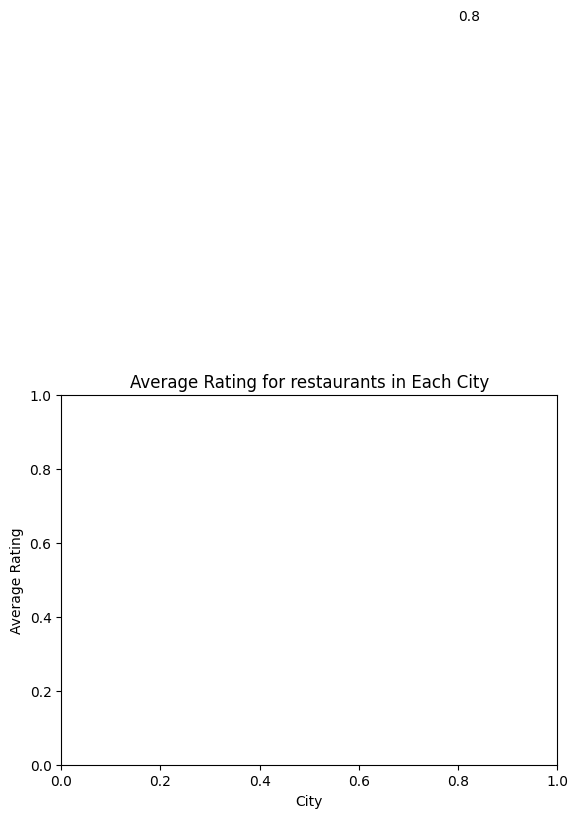

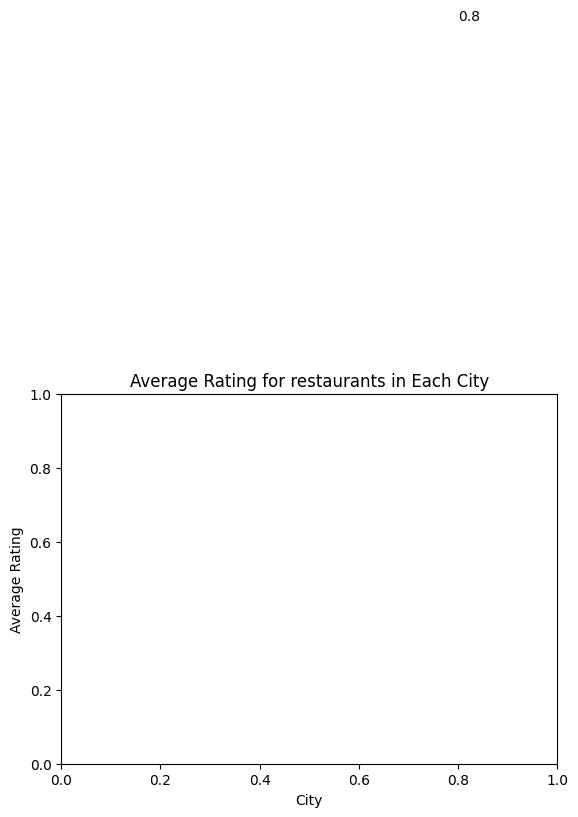

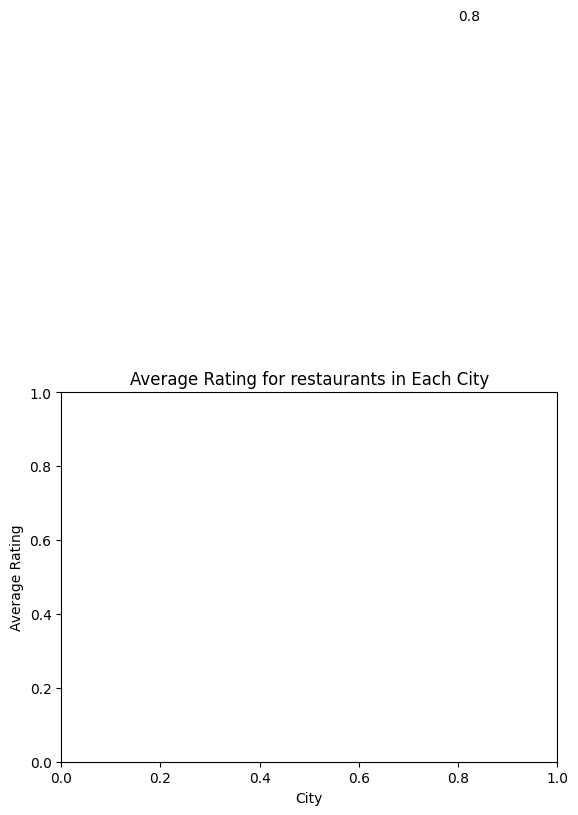

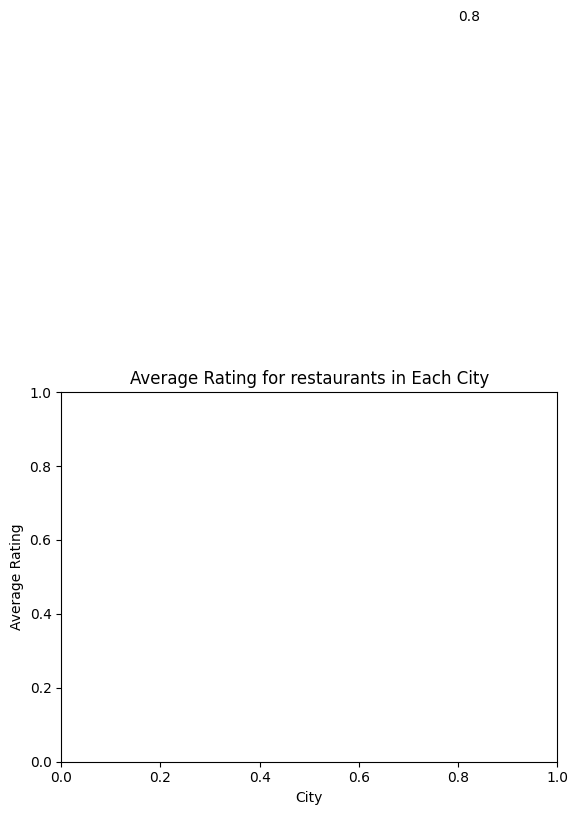

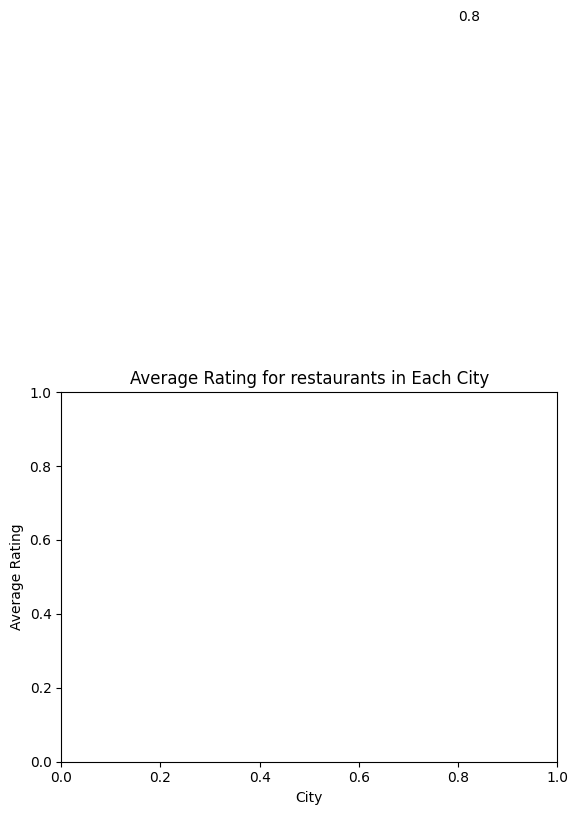

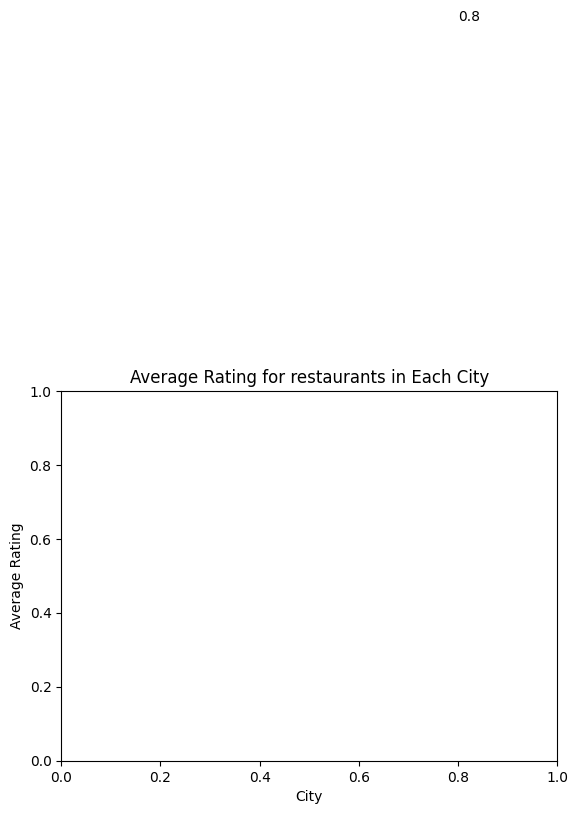

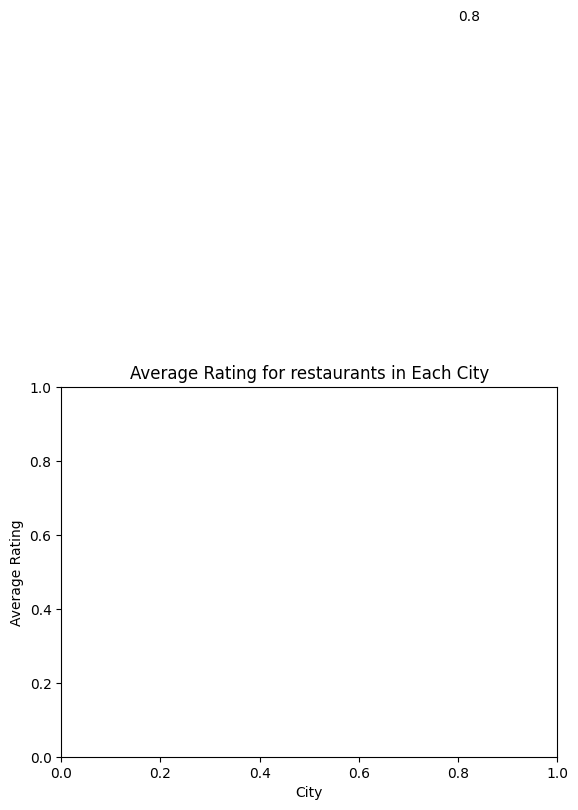

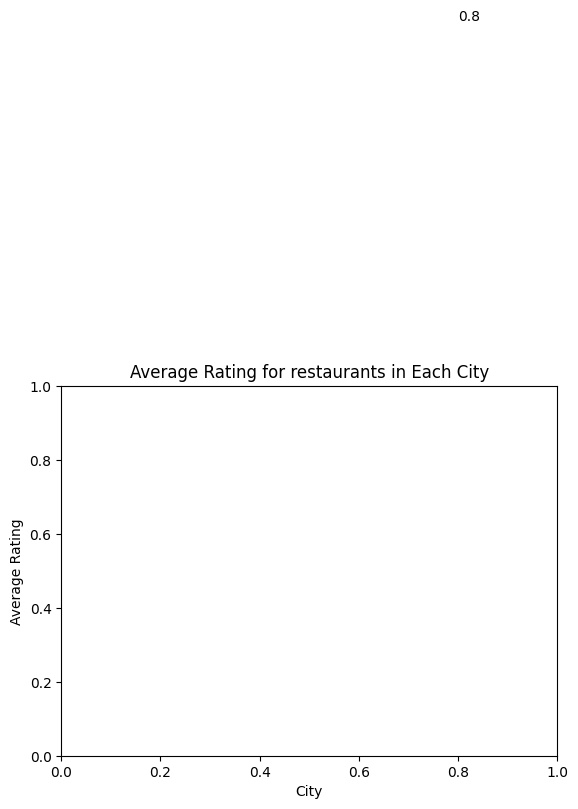

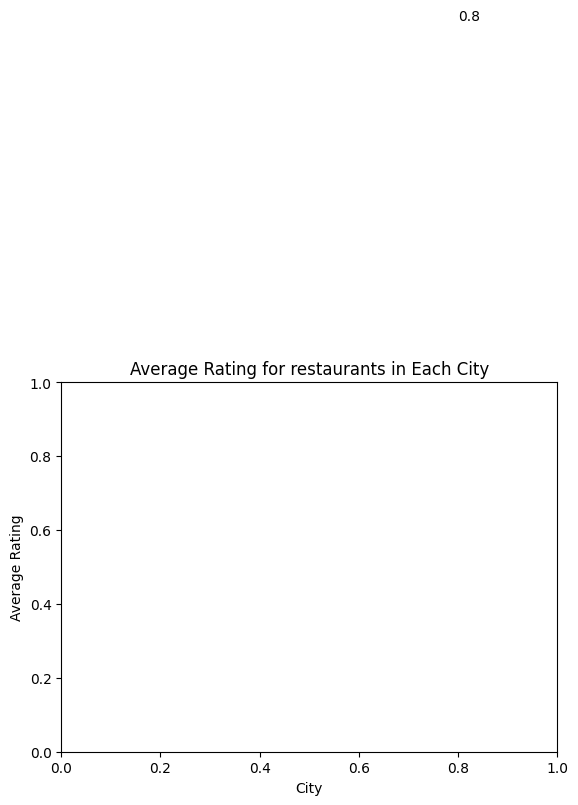

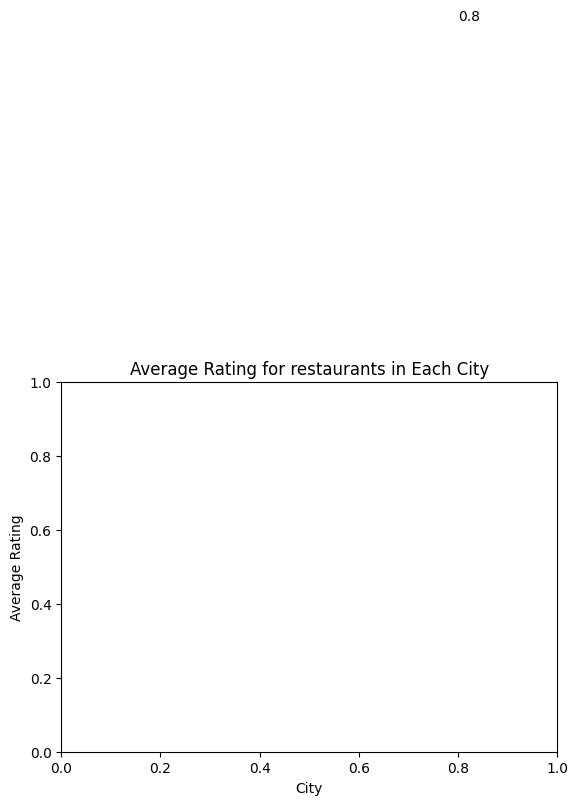

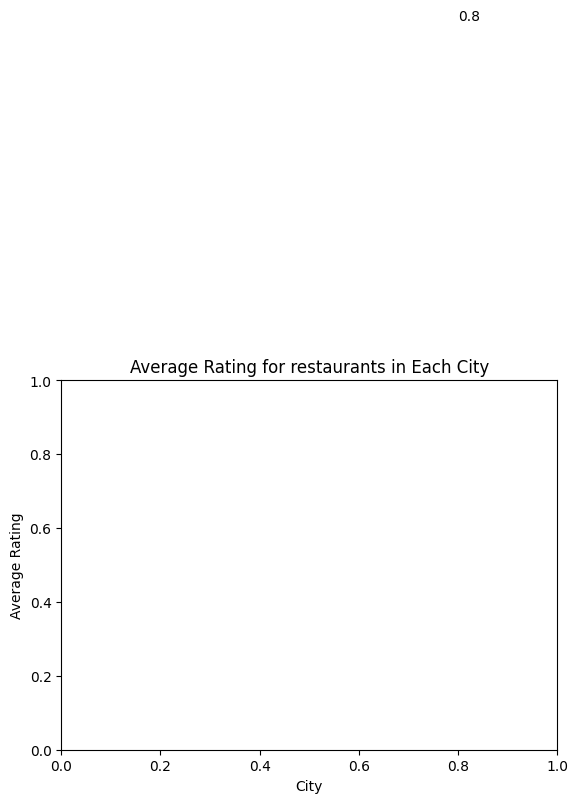

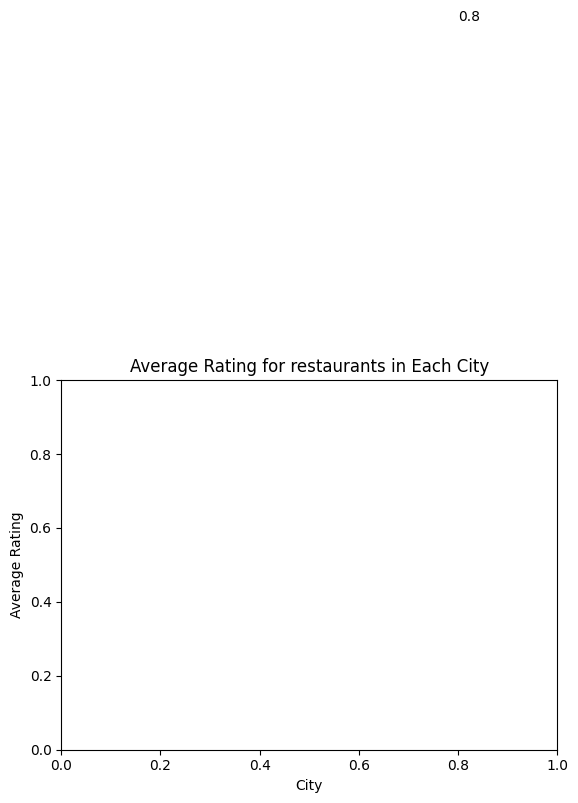

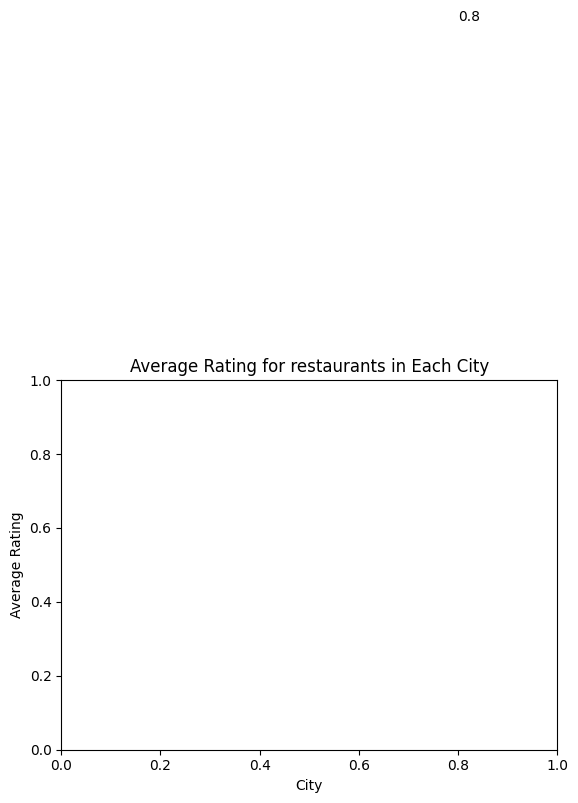

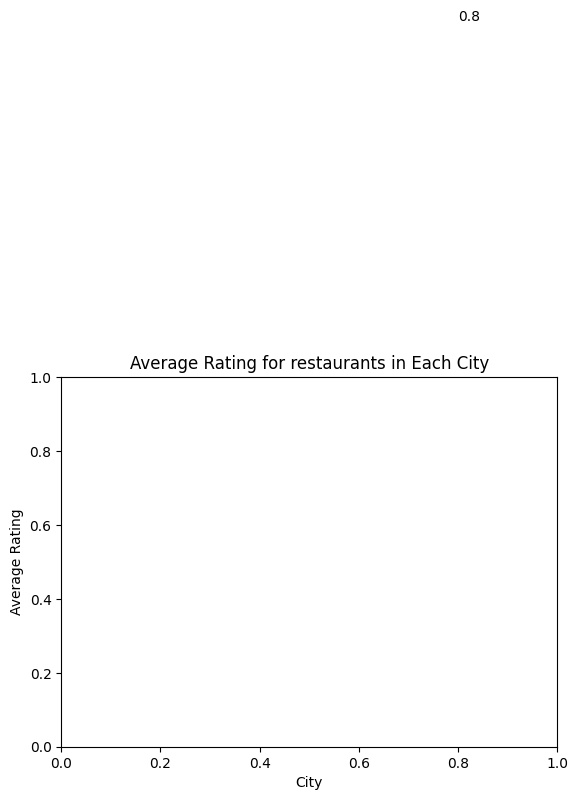

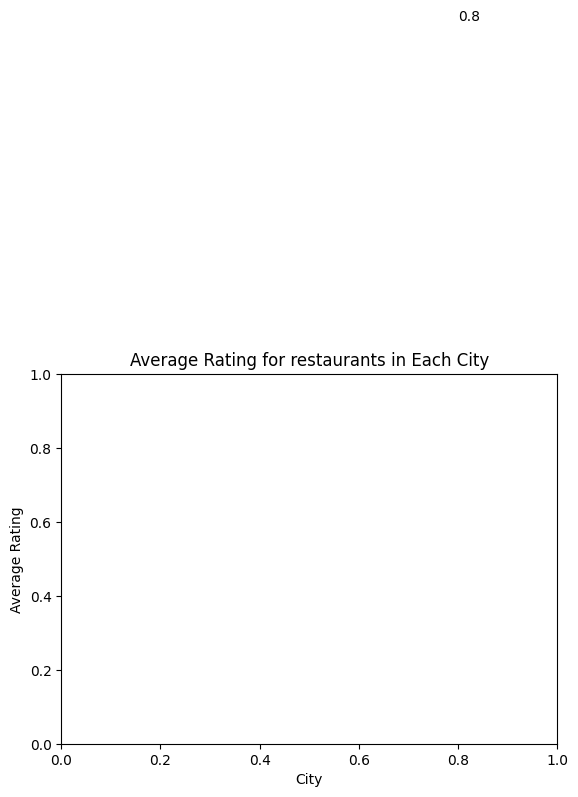

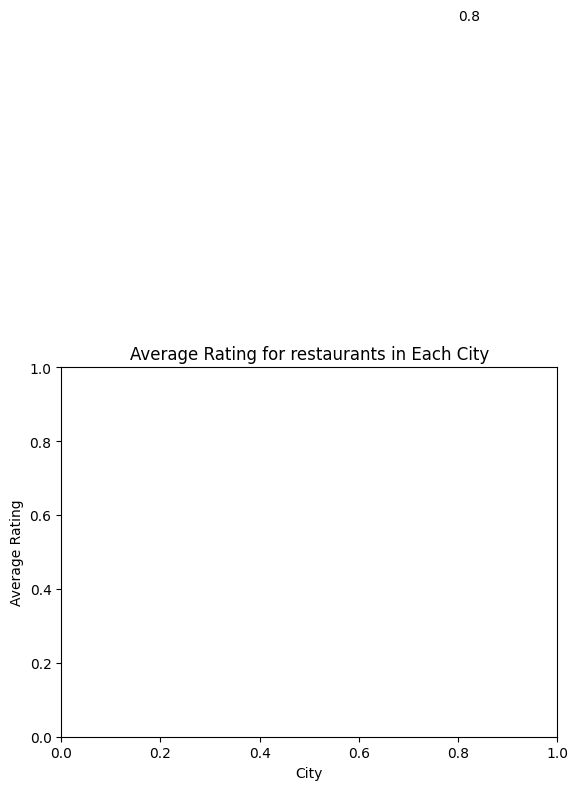

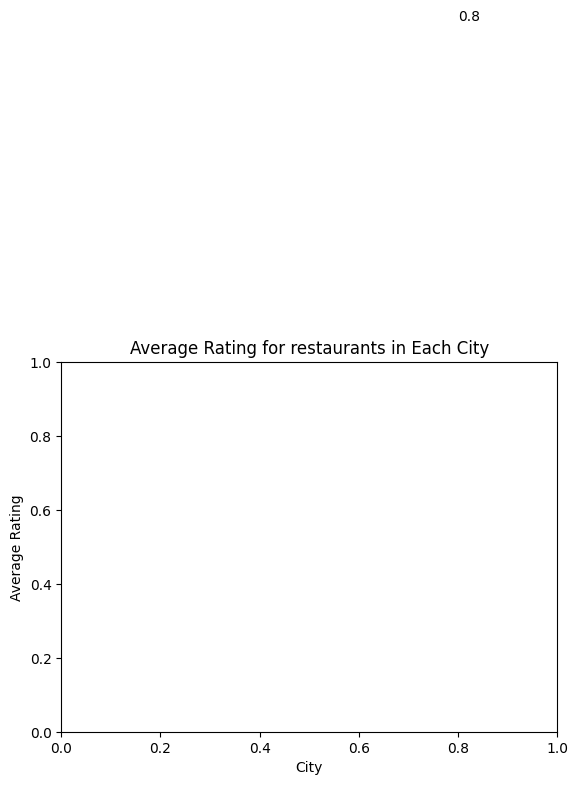

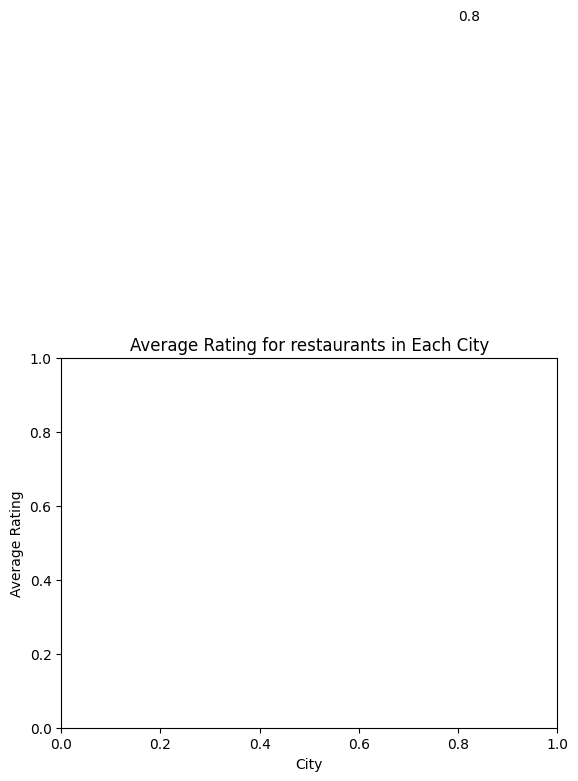

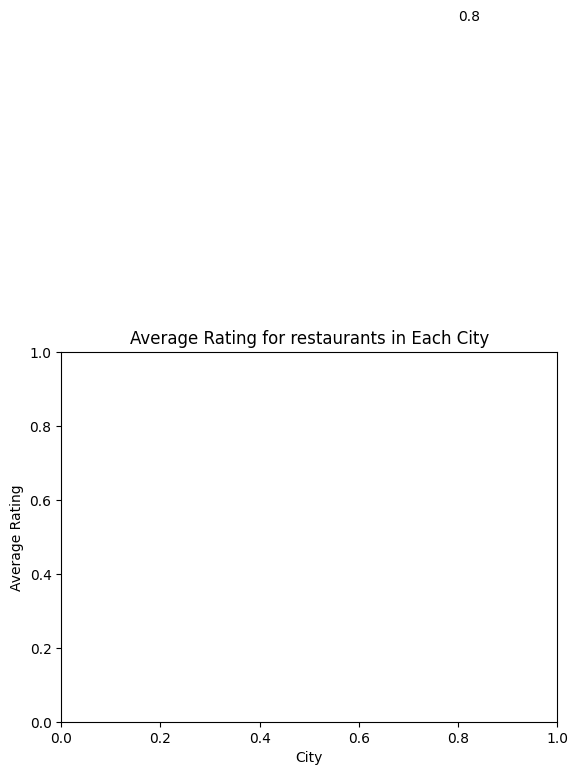

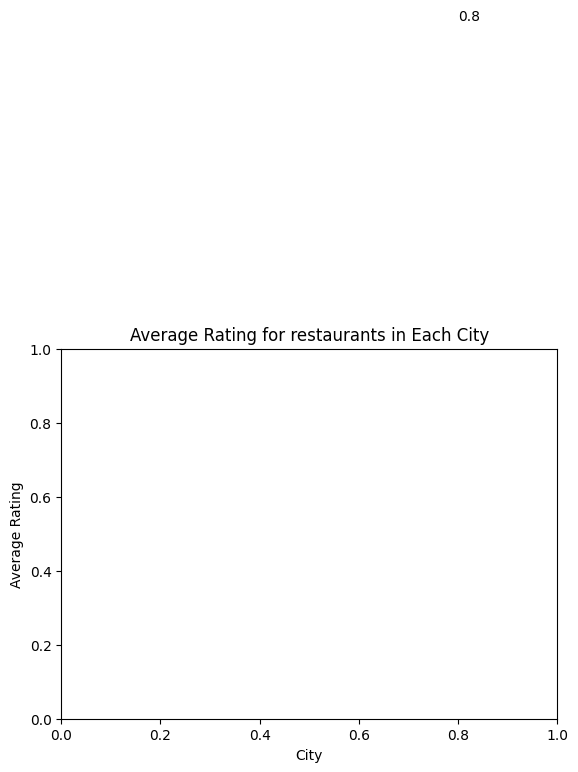

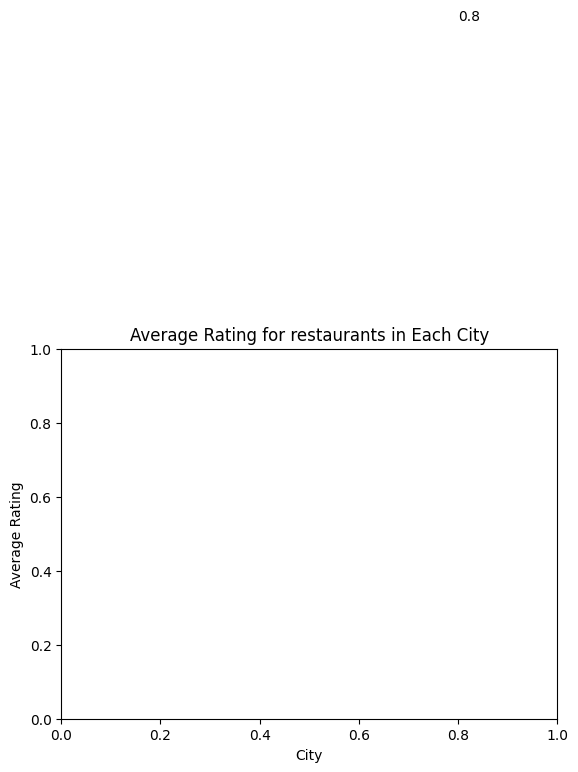

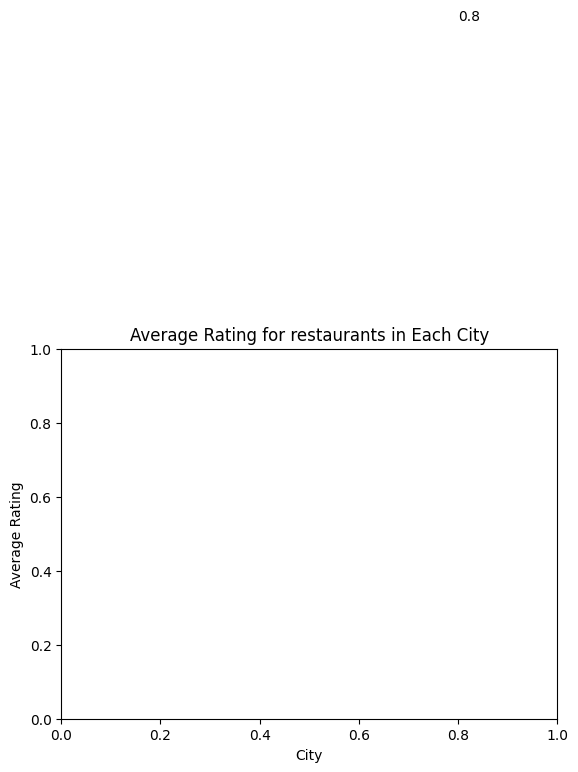

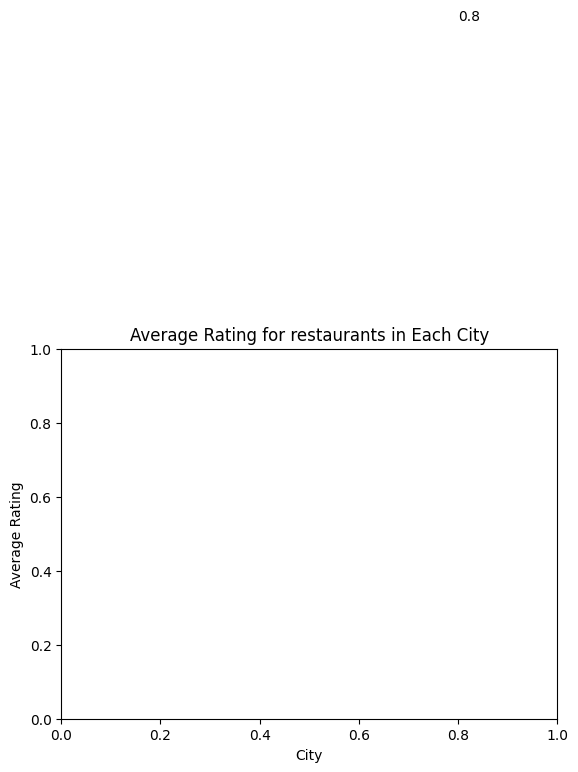

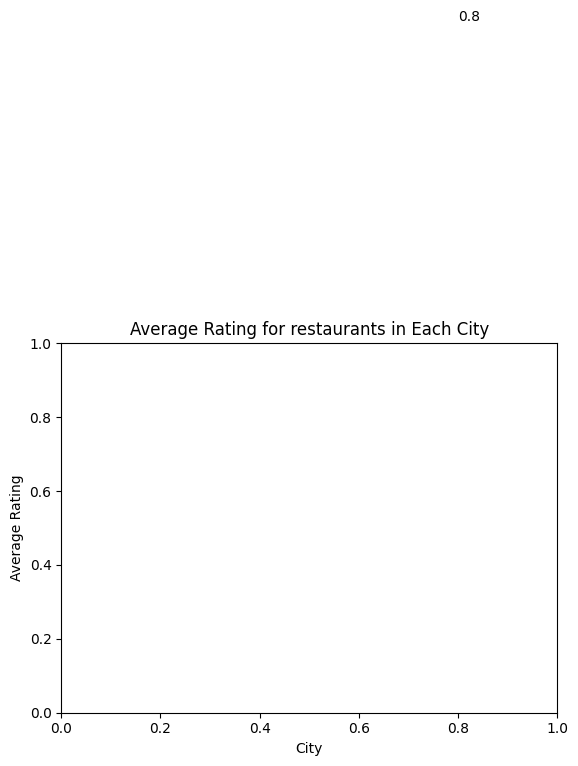

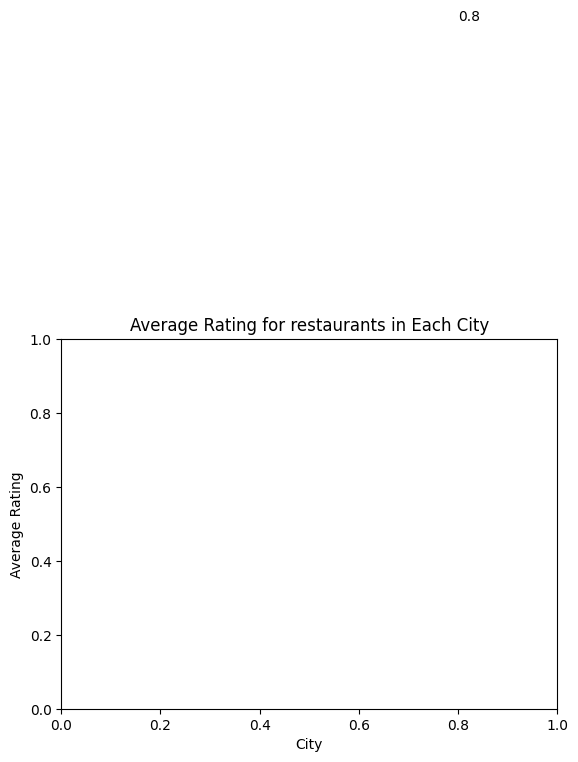

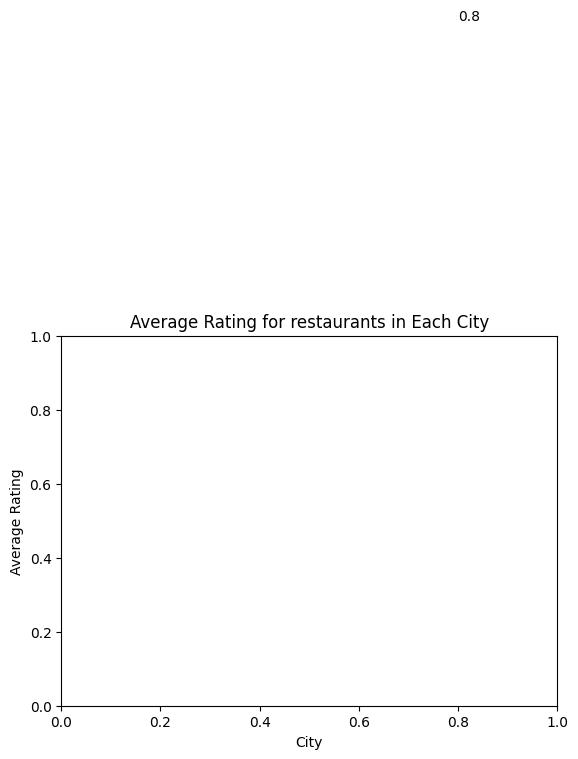

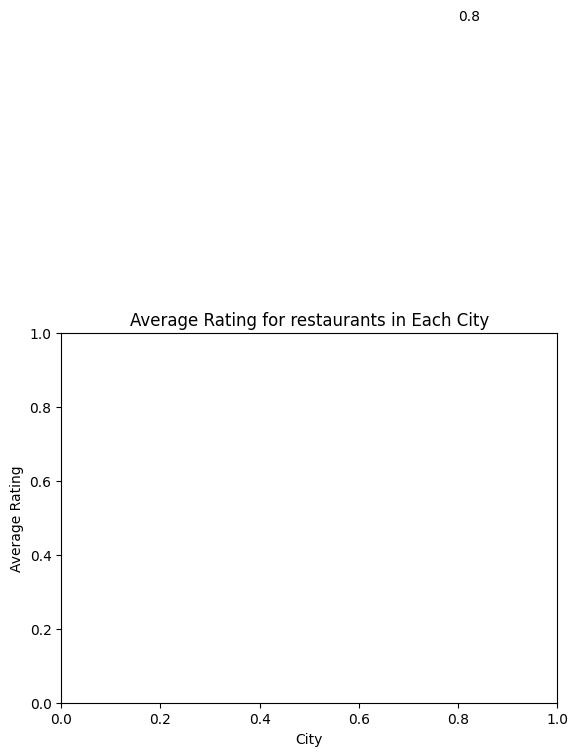

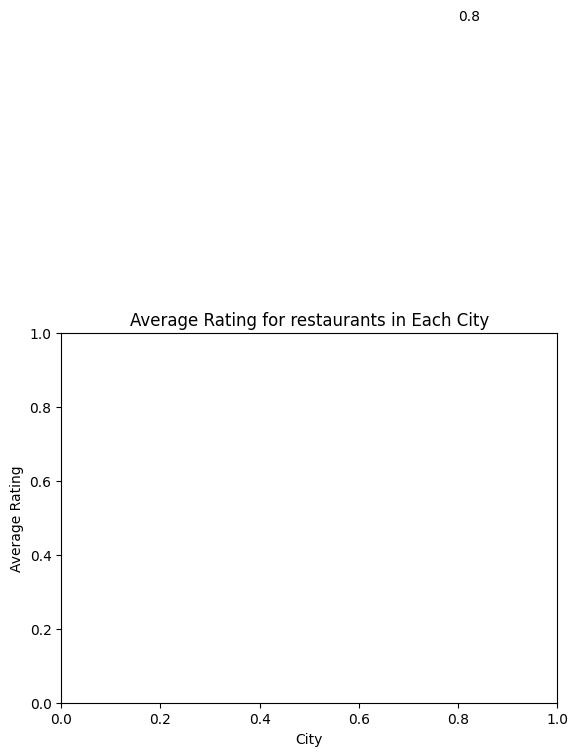

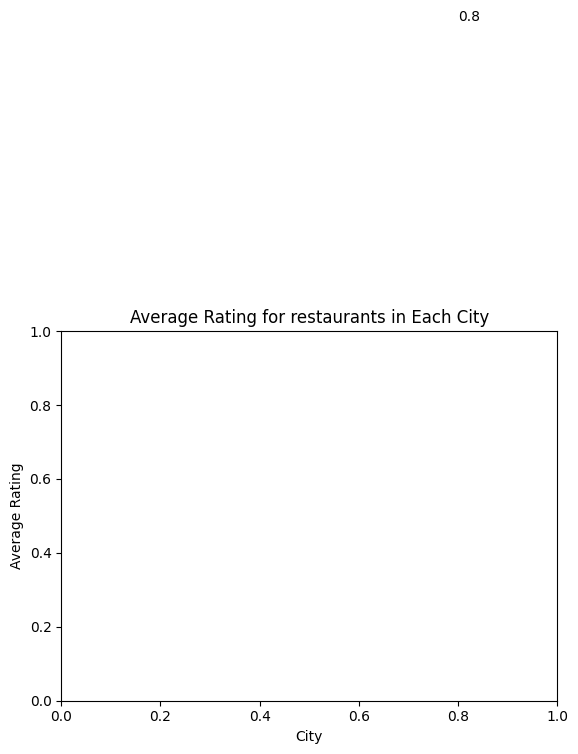

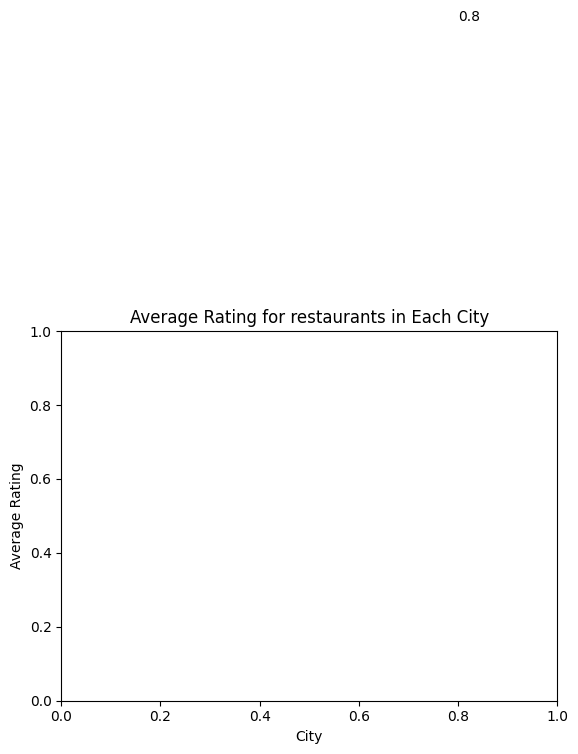

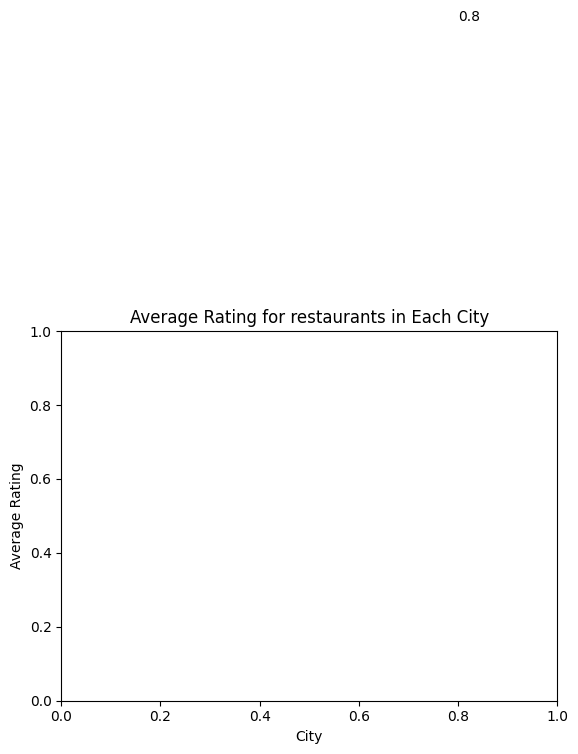

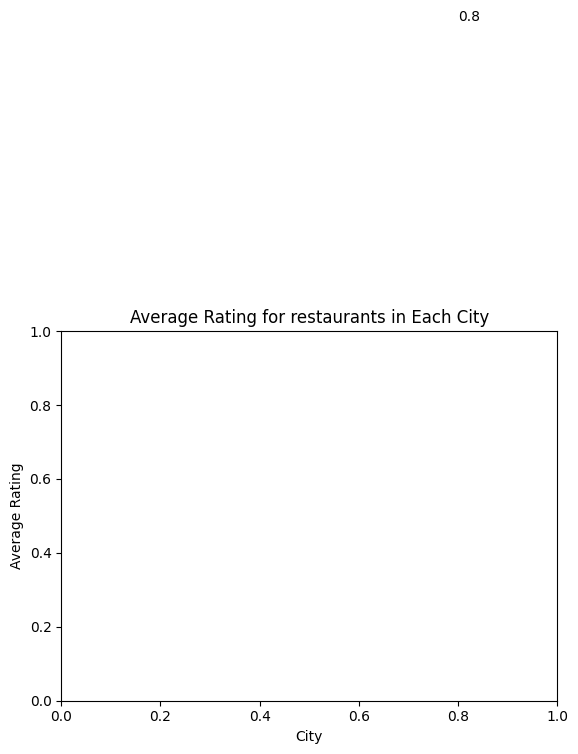

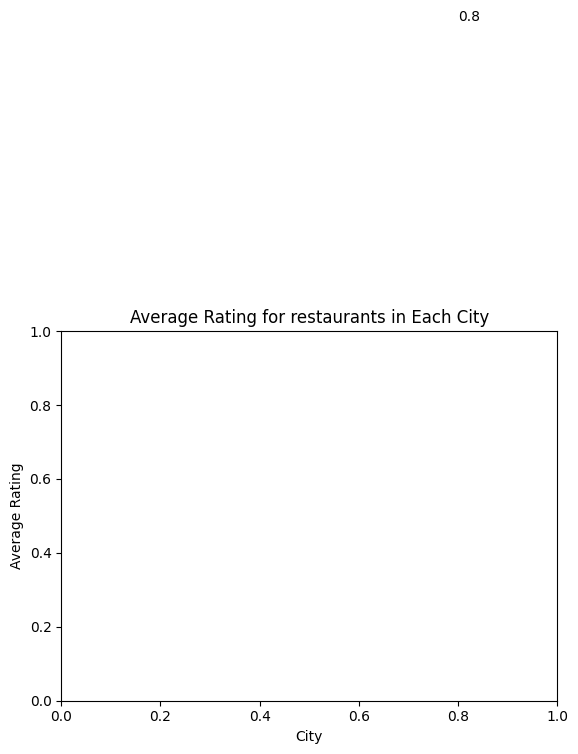

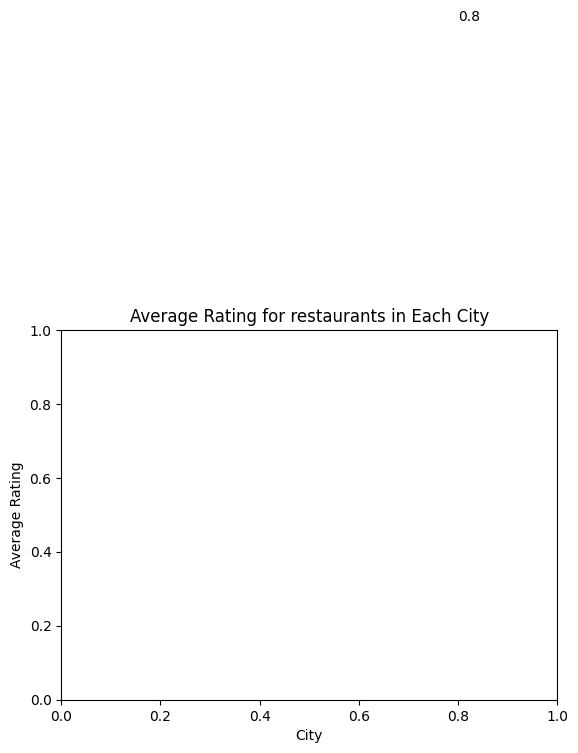

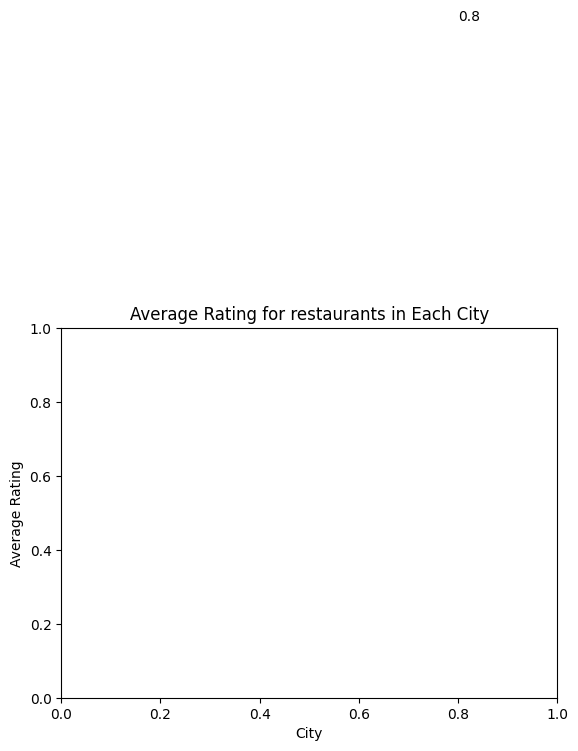

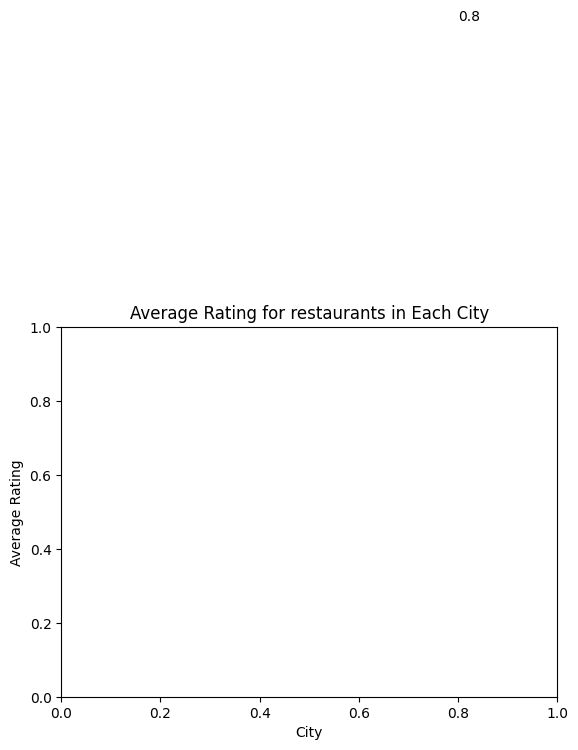

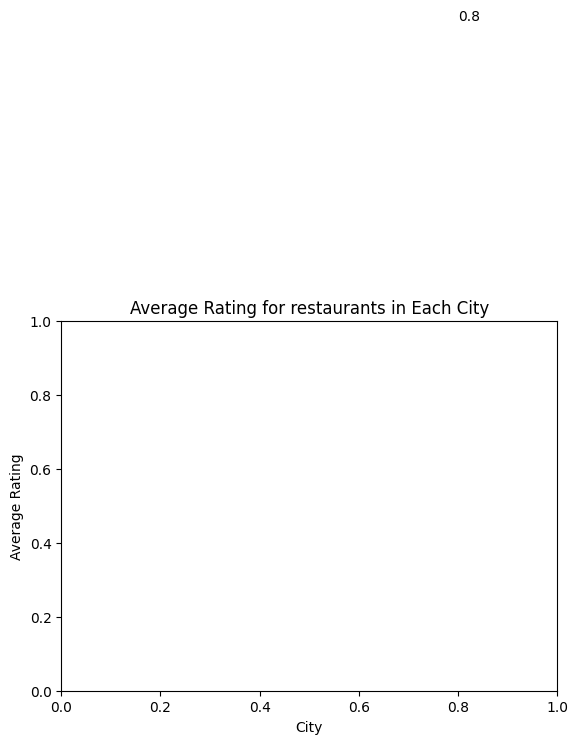

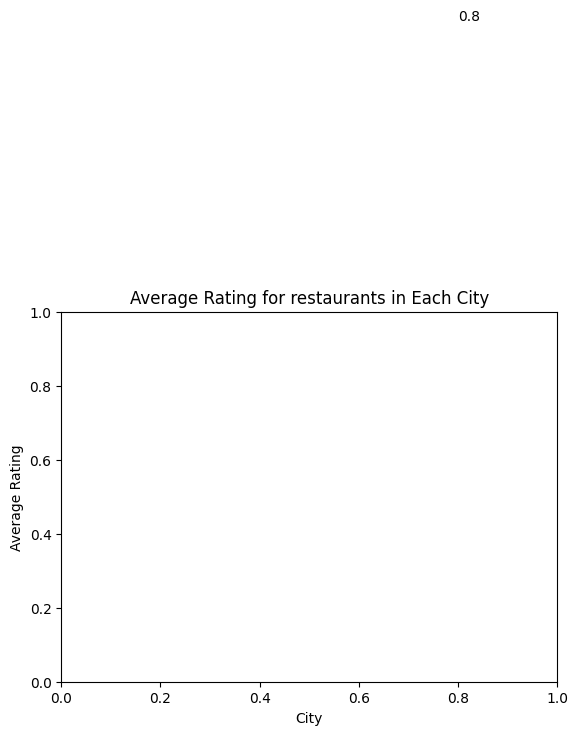

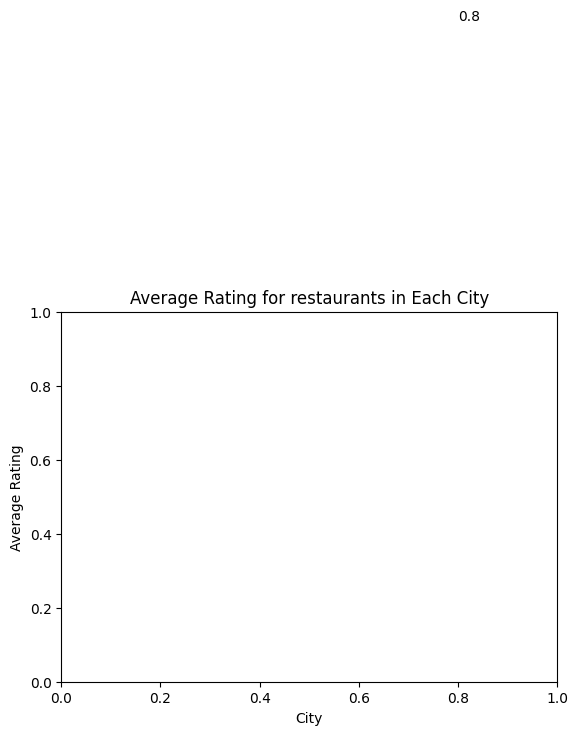

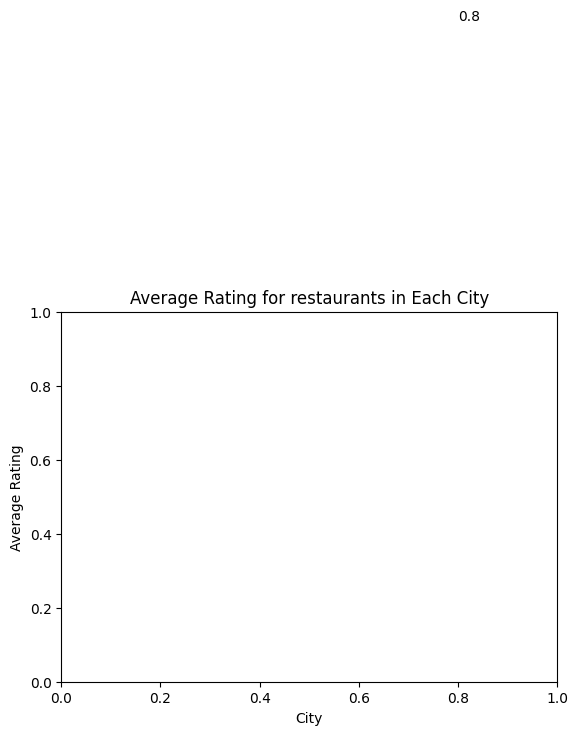

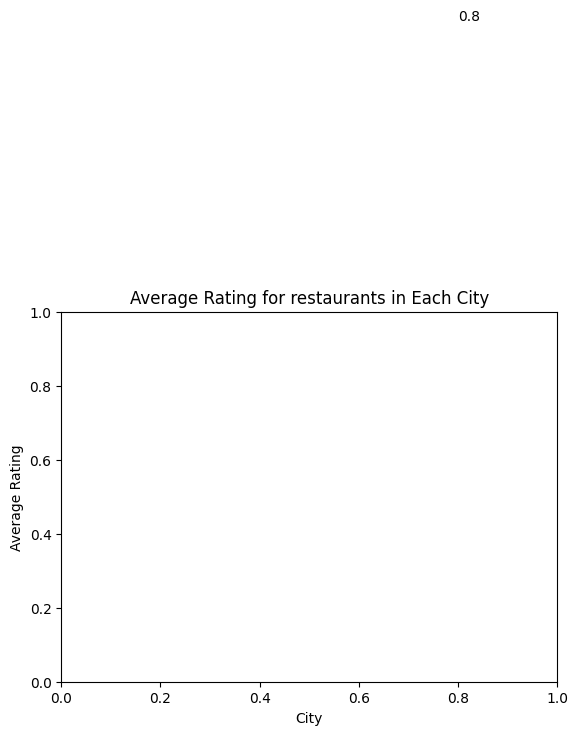

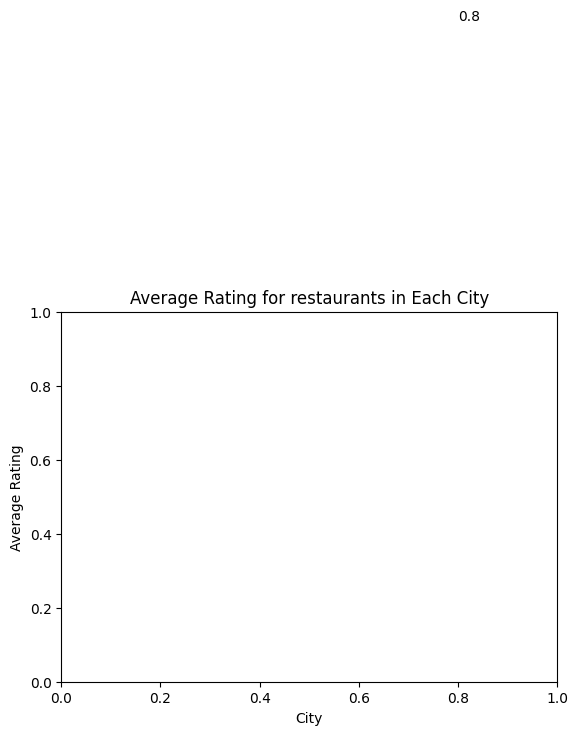

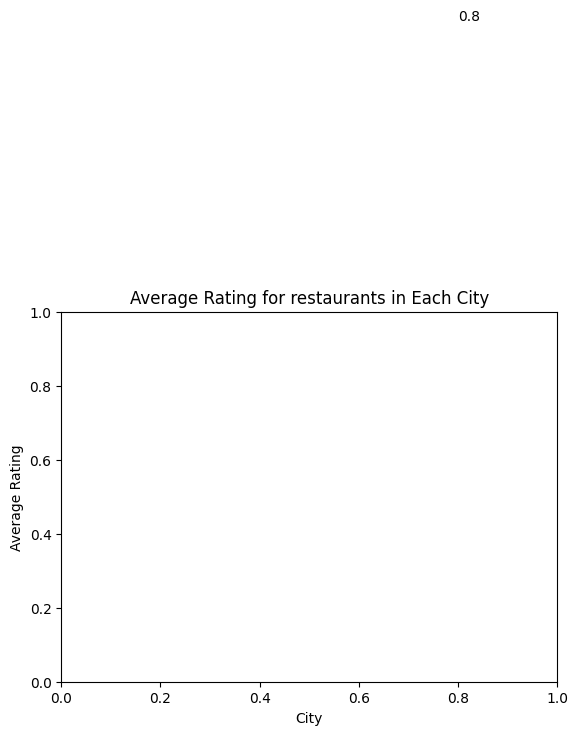

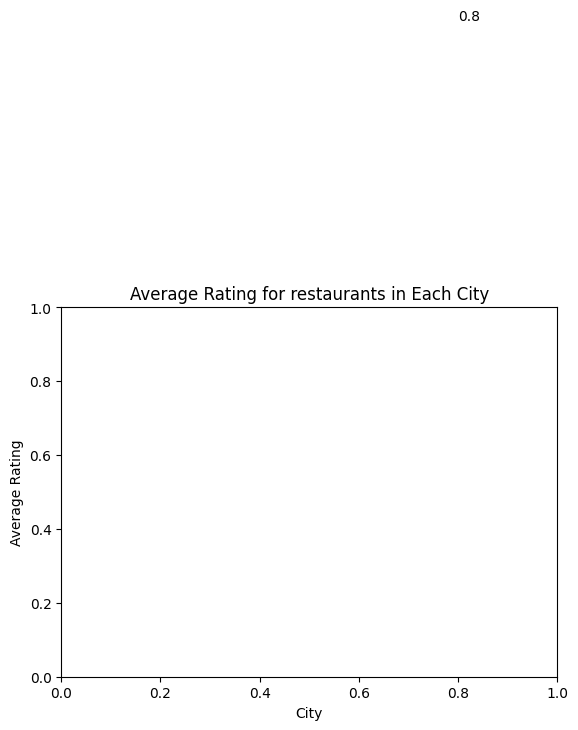

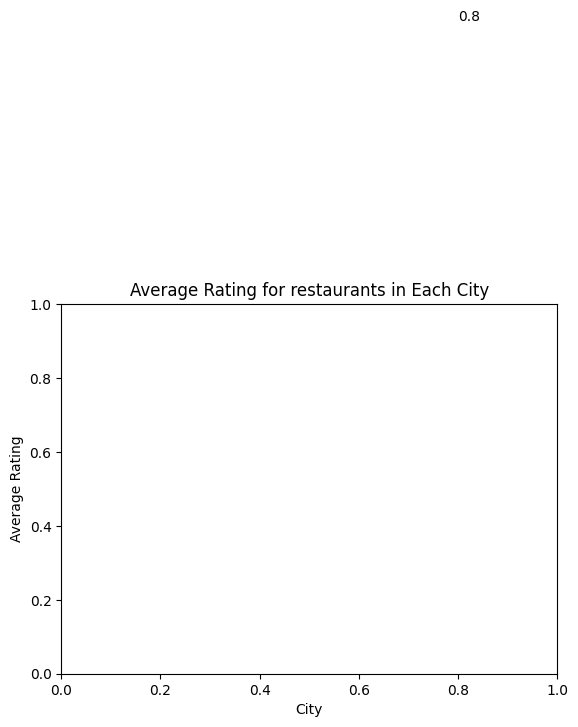

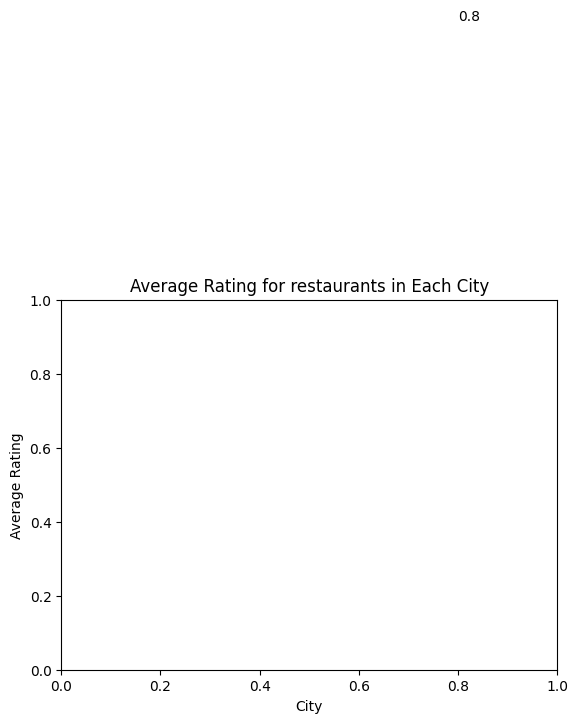

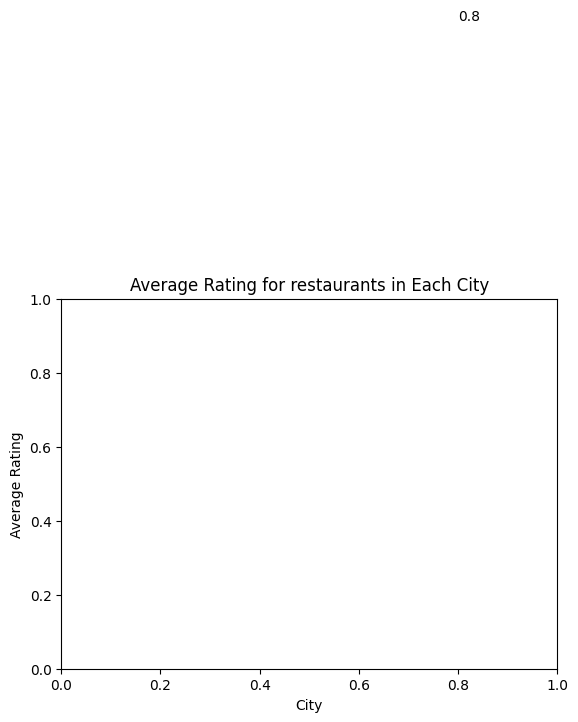

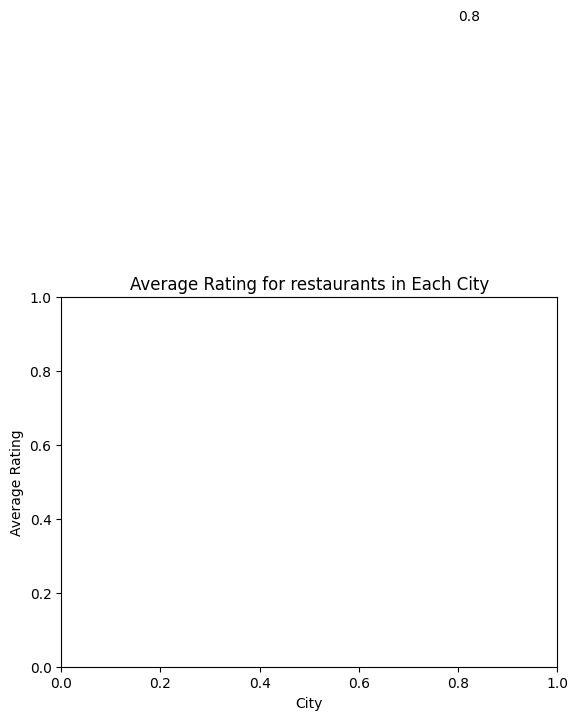

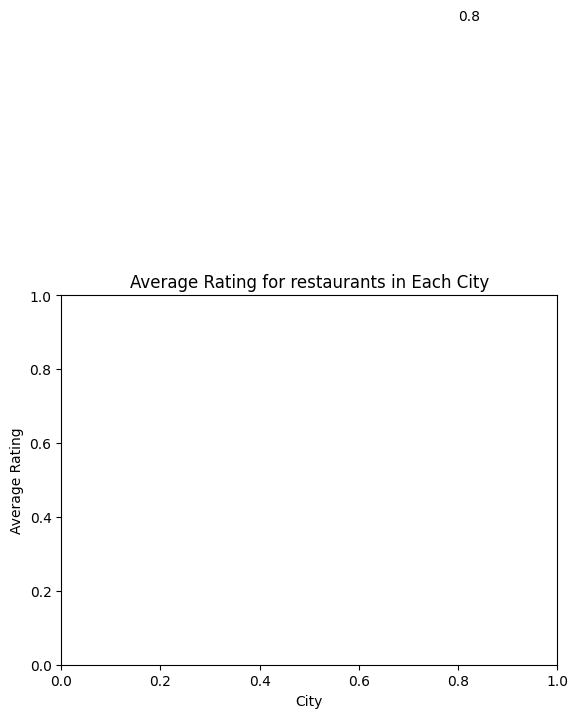

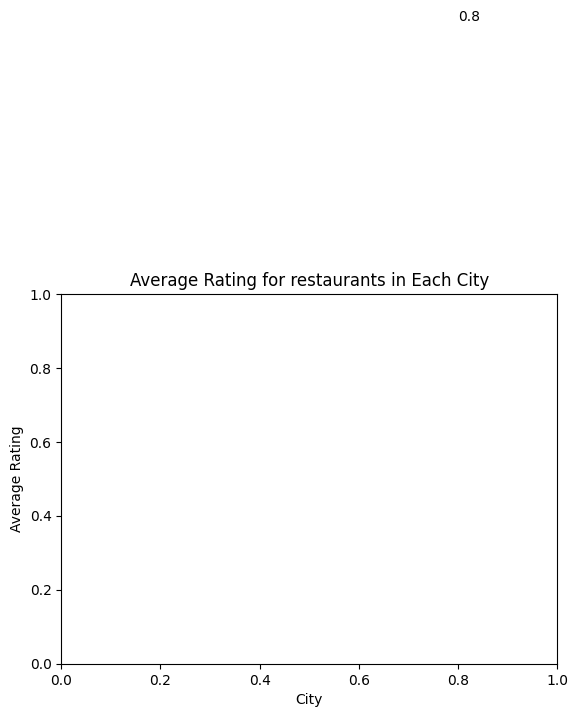

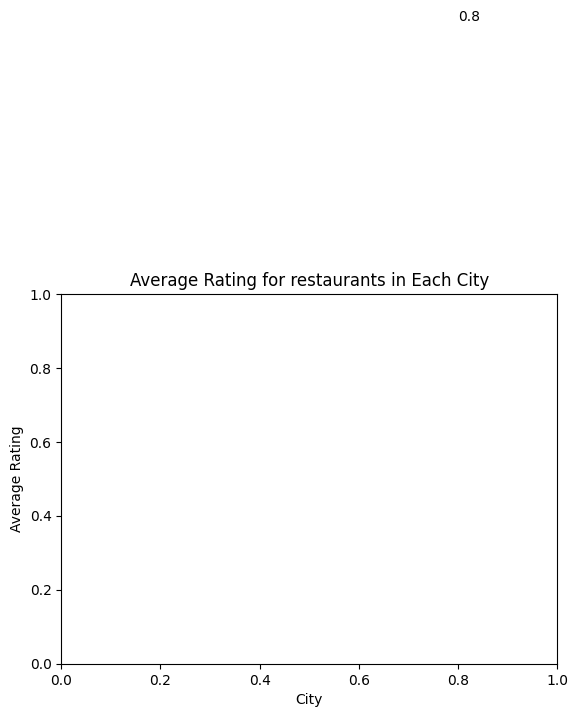

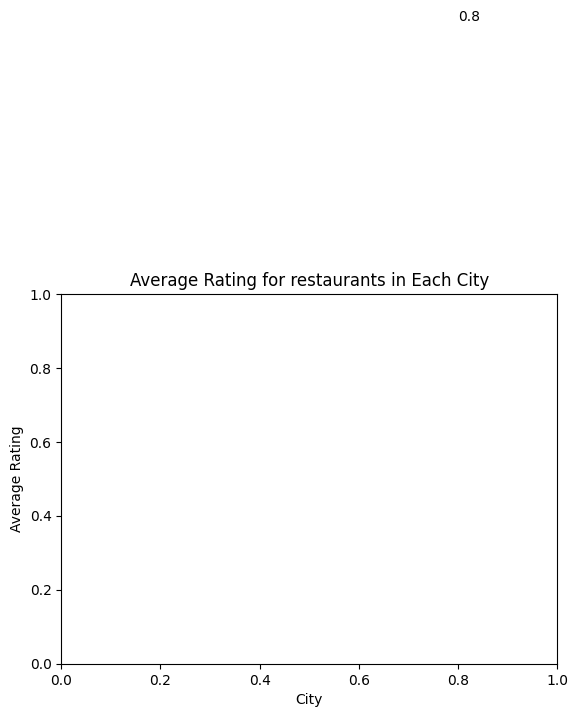

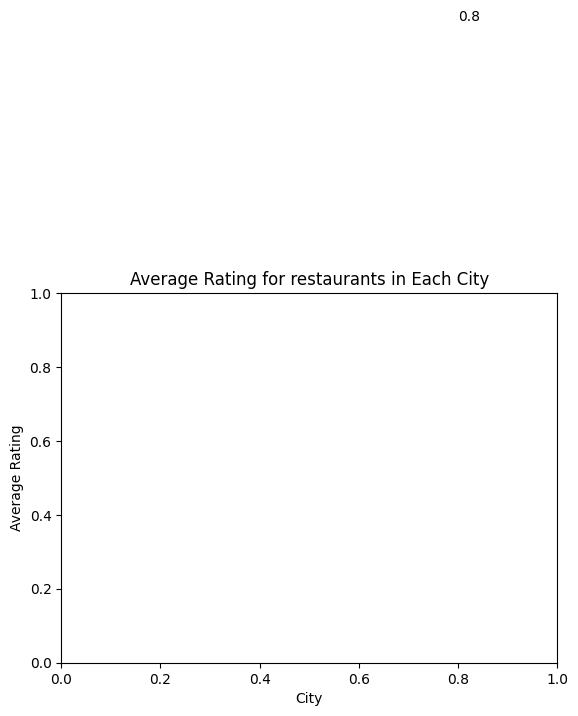

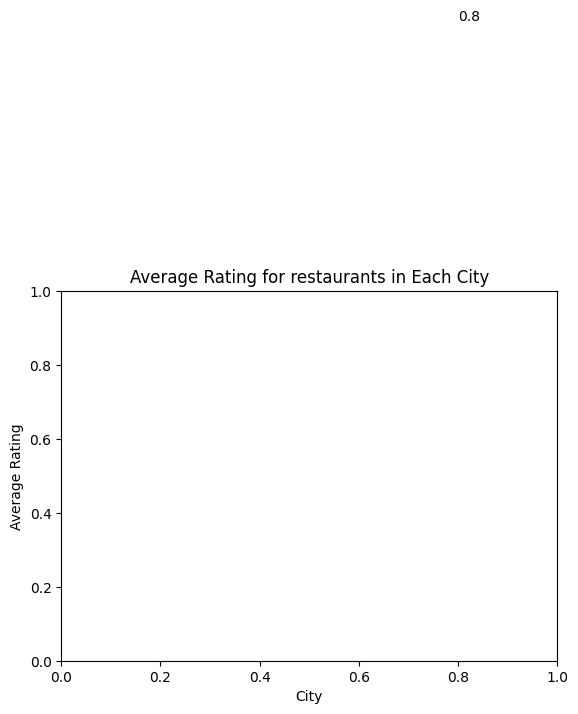

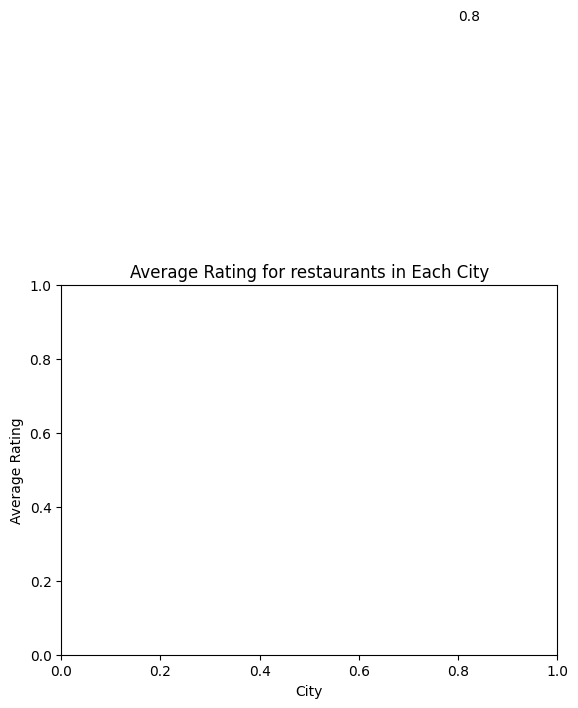

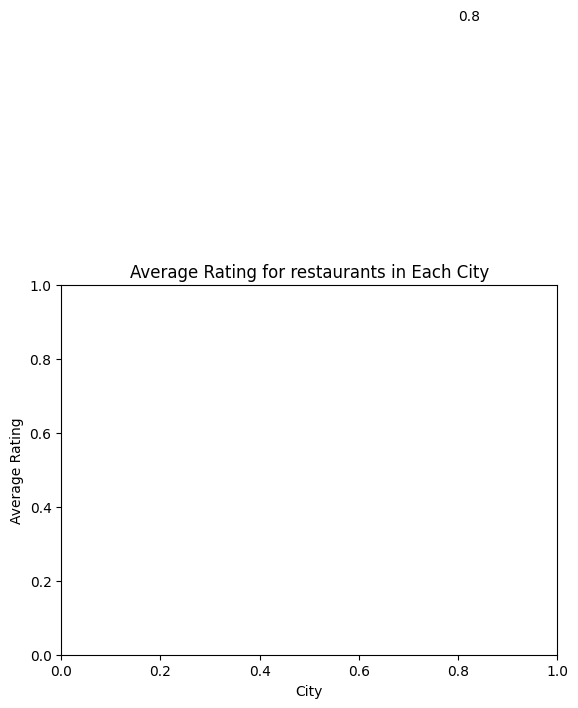

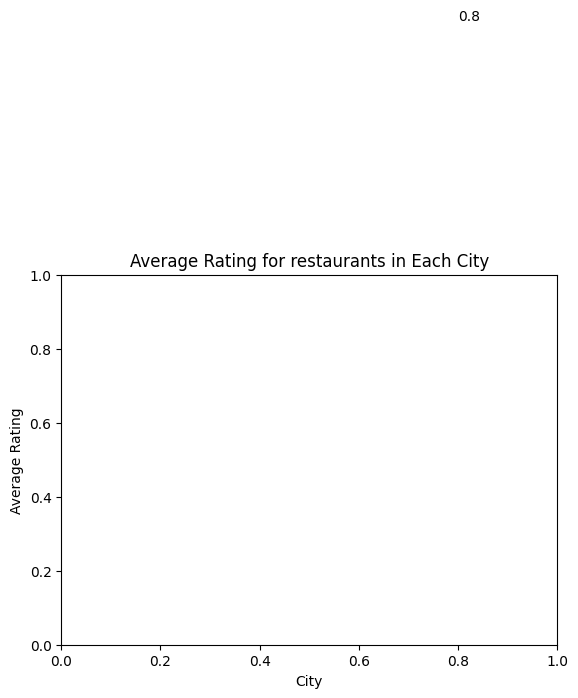

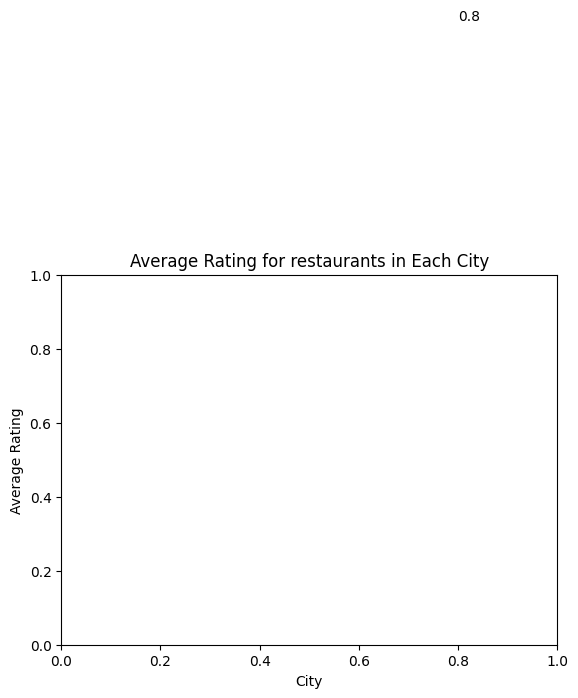

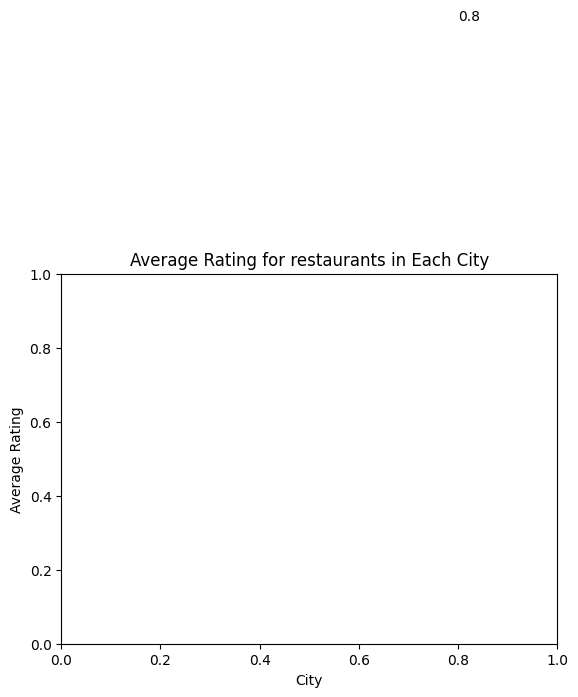

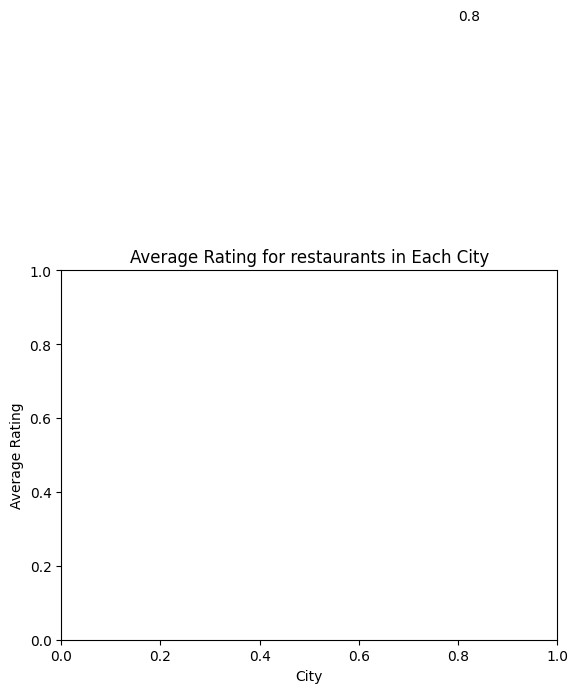

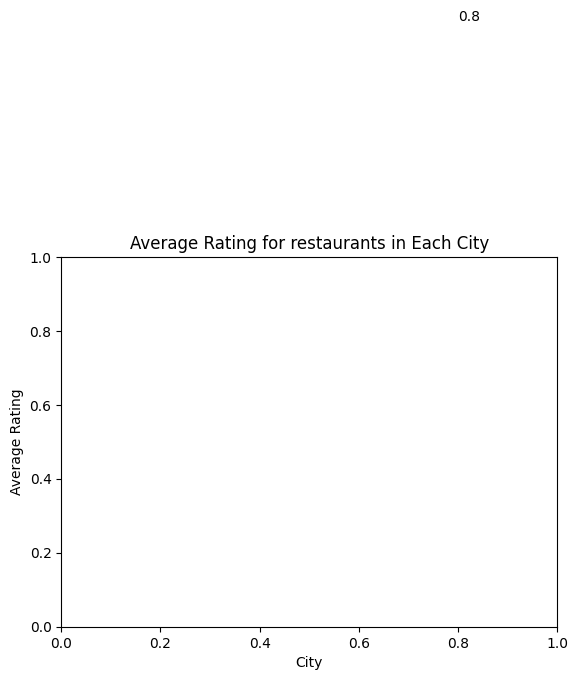

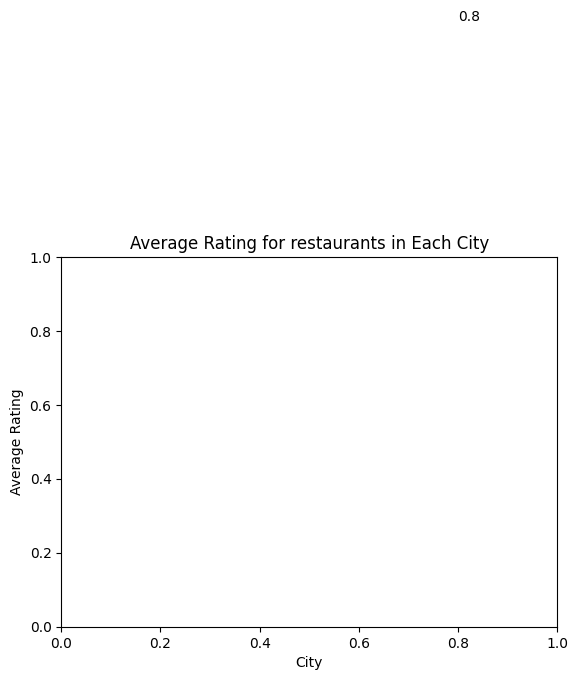

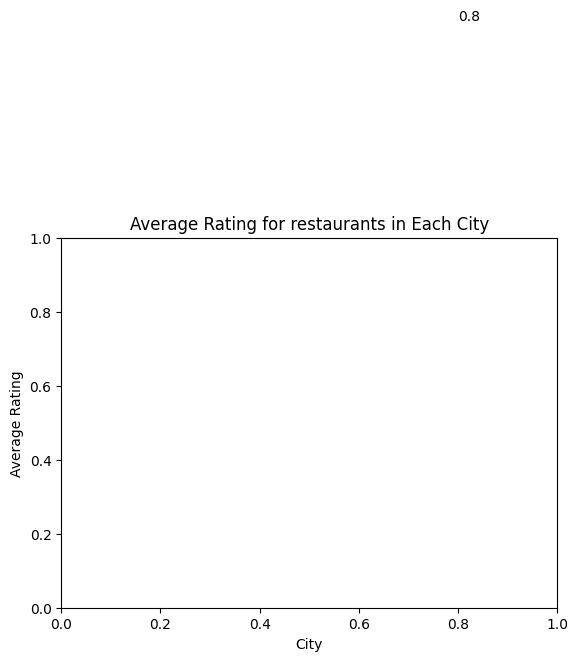

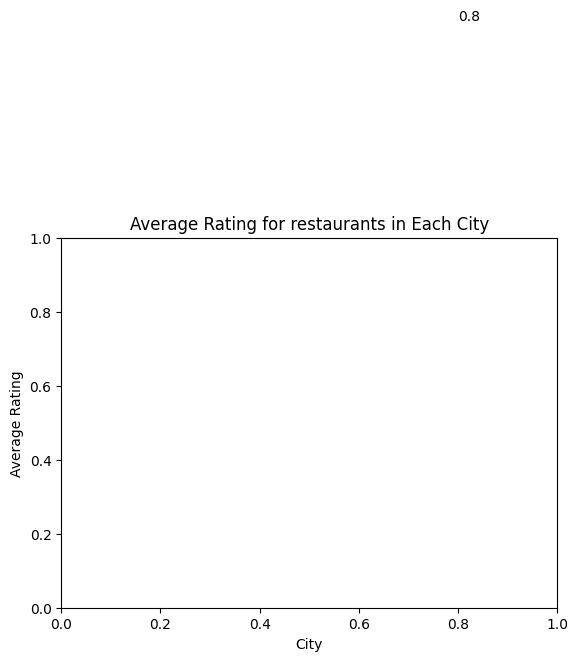

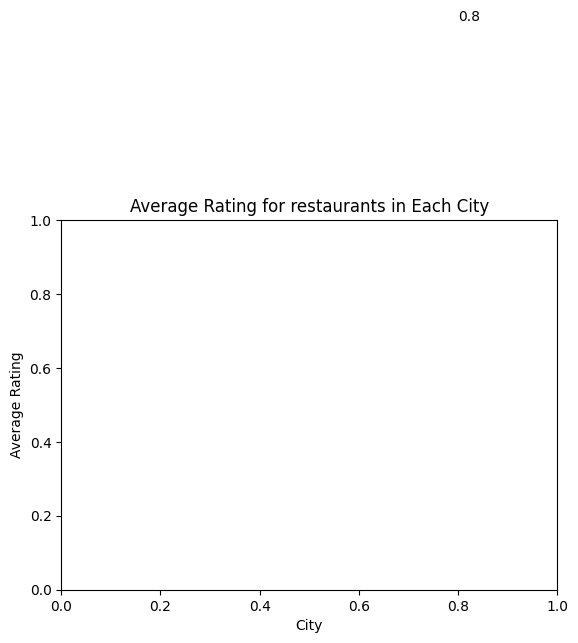

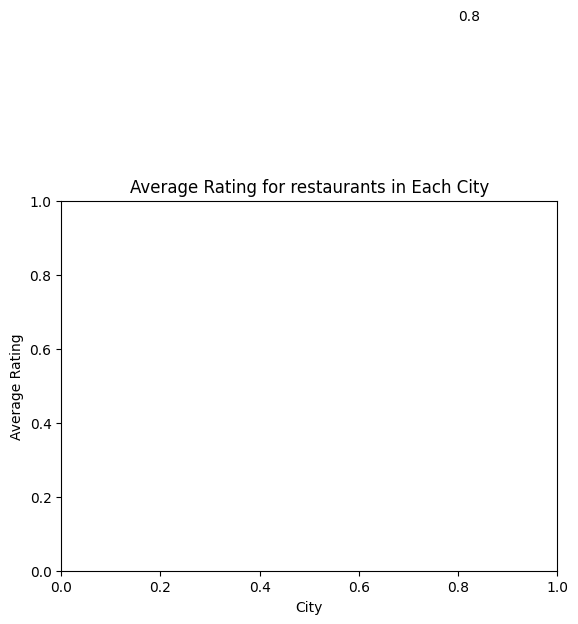

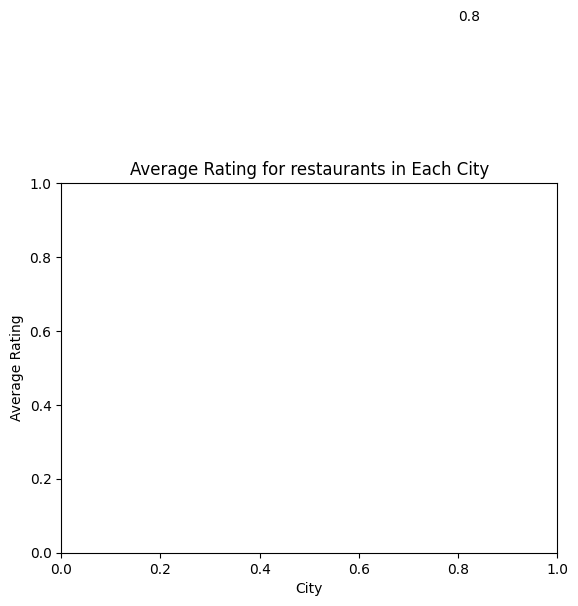

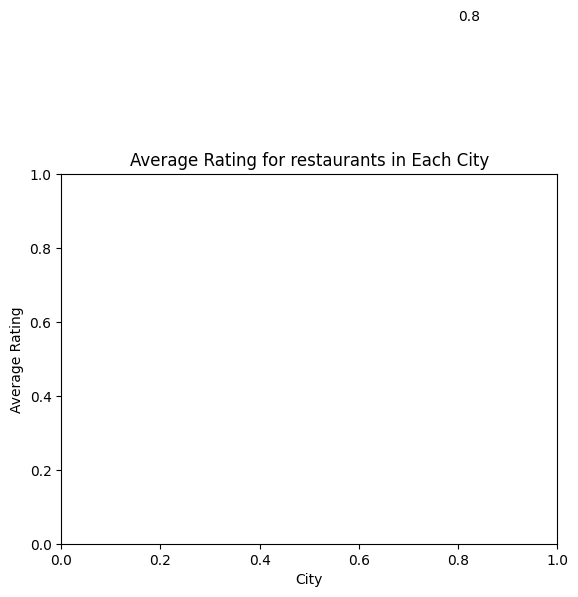

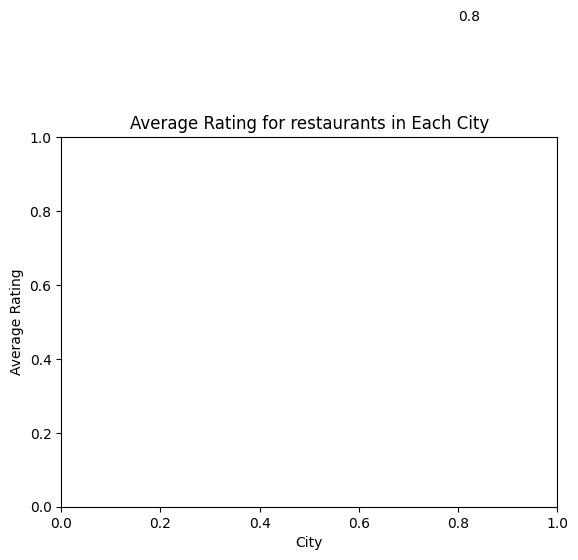

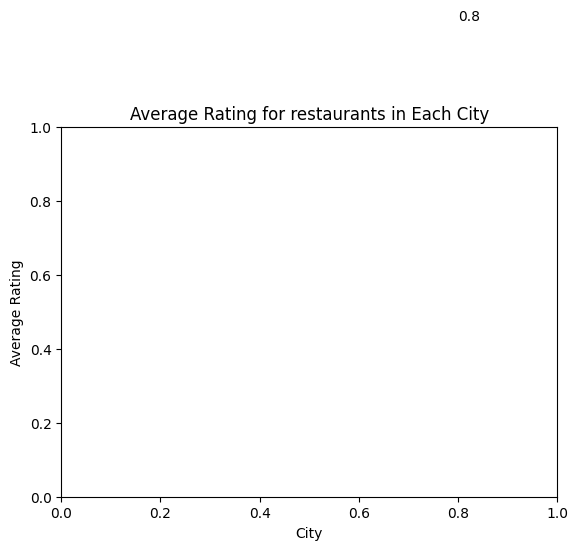

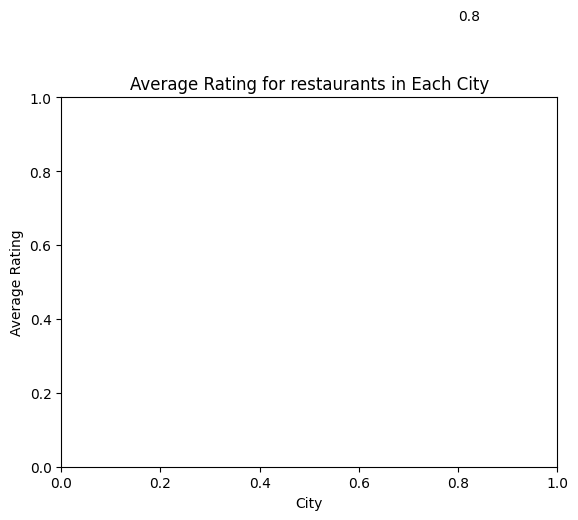

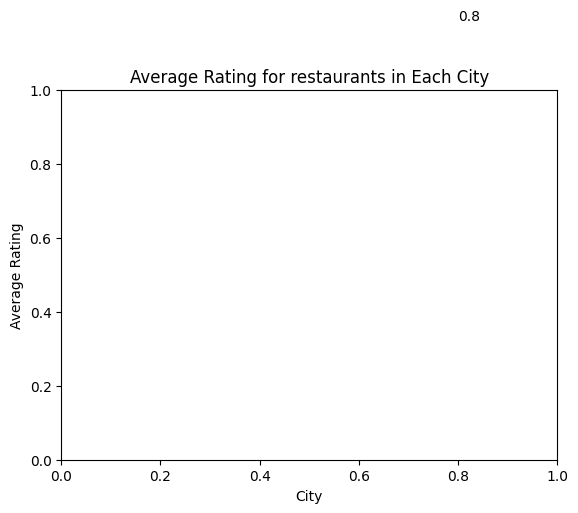

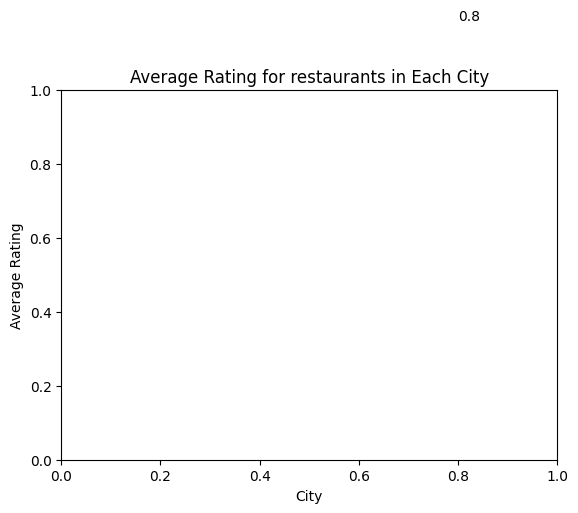

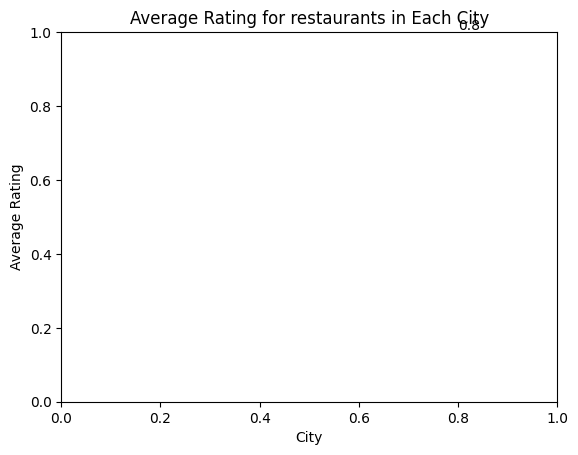

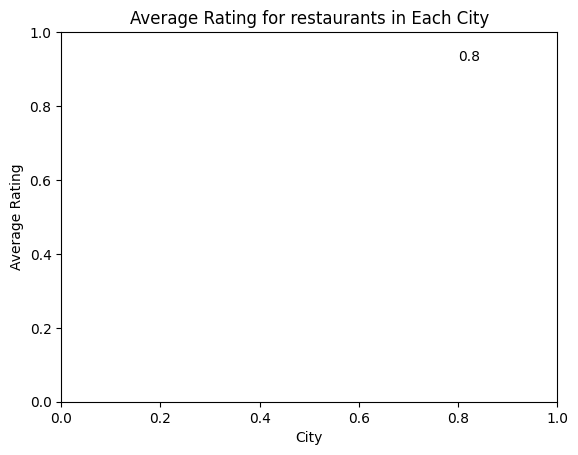

In [47]:
plt.subplots(figsize=(20,100))
# Grouping data
average_restaurants_rating = (
    dataset.groupby('City')
    .agg(Average_rating=('Aggregate rating', 'mean'))
    .sort_values(by='Average_rating', ascending=False)
)

# plotting
bars=plt.bar(average_restaurant_rating.index,average_restaurant_rating['average_rating'])

# adding labels
for bar in bars:
    plt.text(bar.get_width(),bar.get_y()+bar.get_height()/2,round(bar.get_width(),2),ha='left',va='center')

    # adding title and labels
    plt.title('Average Rating for restaurants in Each City')
    plt.xlabel('City')
    plt.ylabel('Average Rating')

    plt.show()

In [43]:
# Find average ratings

average_restaurant_rating=dataset.groupby('City').agg(average_rating=('Aggregate rating','mean')).sort_values(by='average_rating',ascending = False)
print('The City with the highest average rating is', average_restaurant_rating.index[0])

The City with the highest average rating is Inner City
